In [4]:
#load library
#load library
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as acs
from sklearn import datasets
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [131]:
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']

#print(condition_X)

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#condition
print(X)
#print(y)
#print("data length:", len(y))
#print("data length:", len(X))

     Cylinder heating zone 1  Cylinder heating zone 4  \
0                     271.52               316.140000   
1                     271.19               320.240000   
2                     283.09               307.250000   
3                     269.67               298.810000   
4                     290.22               312.940000   
..                       ...                      ...   
126                   287.71               315.920000   
127                   277.99               309.604054   
128                   268.84               311.970000   
129                   288.93               304.010000   
130                   286.02               310.980000   

     Maximum injection pressure  Mould temperature control unit 1  Cycle time  \
0                       1506.14                             92.63      29.860   
1                       1452.35                             91.95      30.138   
2                       1474.93                             87.64      2

In [132]:
# create save path
path = os.getcwd()
savePath = path + '/project_decision_tree_results/'
print(savePath)

C:\Users\lolif\Machine Learning/project_decision_tree_results/


In [133]:
#Defining visualization function
import warnings
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [134]:
#Decision tree method

In [135]:
#converting dataframe to numpy
features = condition_X.keys().to_numpy()
data = condition_y[~condition.duplicated('Condition')].to_numpy()
data = ["Normal1","Condition4","Condition3"]
features
#print(data)

array(['Cylinder heating zone 1', 'Cylinder heating zone 4',
       'Maximum injection pressure', 'Mould temperature control unit 1',
       'Cycle time', 'Cylinder heating zone 5', 'Injection time',
       'Cylinder heating zone 2', 'Dosage time',
       'Cylinder heating zone 3', 'Switch-over volume',
       'Material cushion'], dtype=object)

training data length: 98
verification data length: 33
Accuracy: 0.85


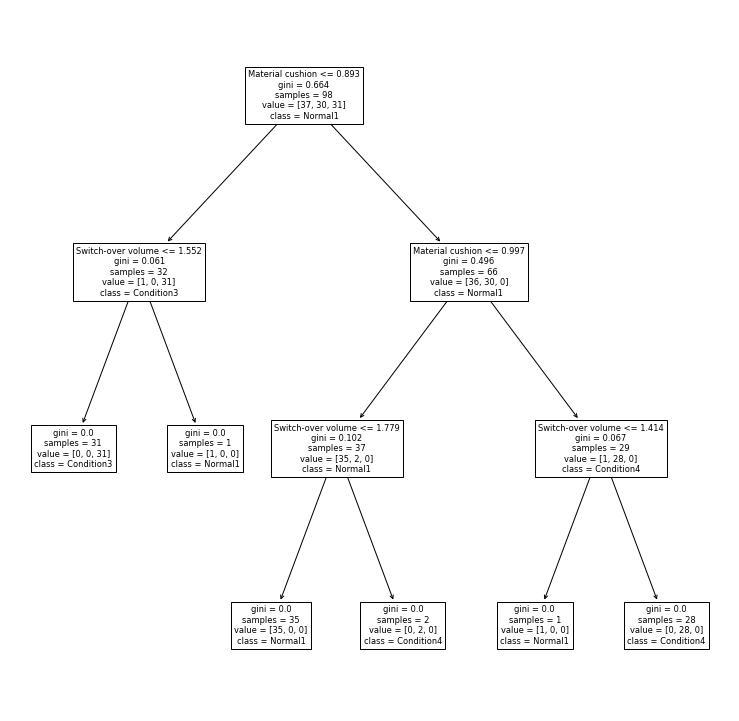

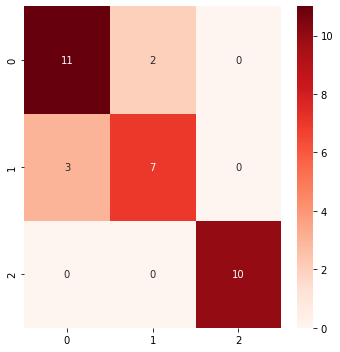

                            importance
Material cushion              0.882346
Switch-over volume            0.117654
Cylinder heating zone 1       0.000000
Cylinder heating zone 4       0.000000
Maximum injection pressure    0.000000
DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0, random_state=0)
training data length: 98
verification data length: 33
Accuracy: 0.94


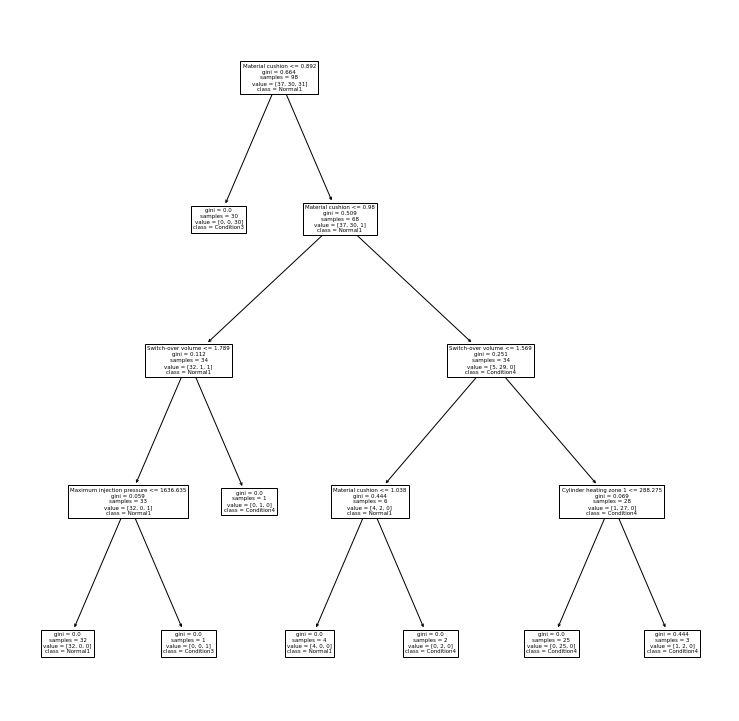

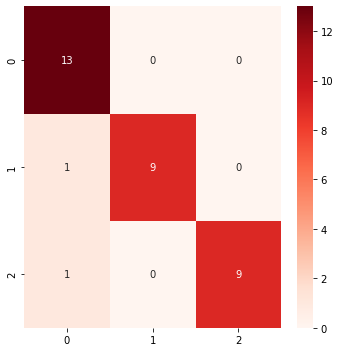

                            importance
Material cushion              0.868886
Switch-over volume            0.091329
Maximum injection pressure    0.030442
Cylinder heating zone 1       0.009343
Cylinder heating zone 4       0.000000
DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0, random_state=0)
training data length: 98
verification data length: 33
Accuracy: 0.94


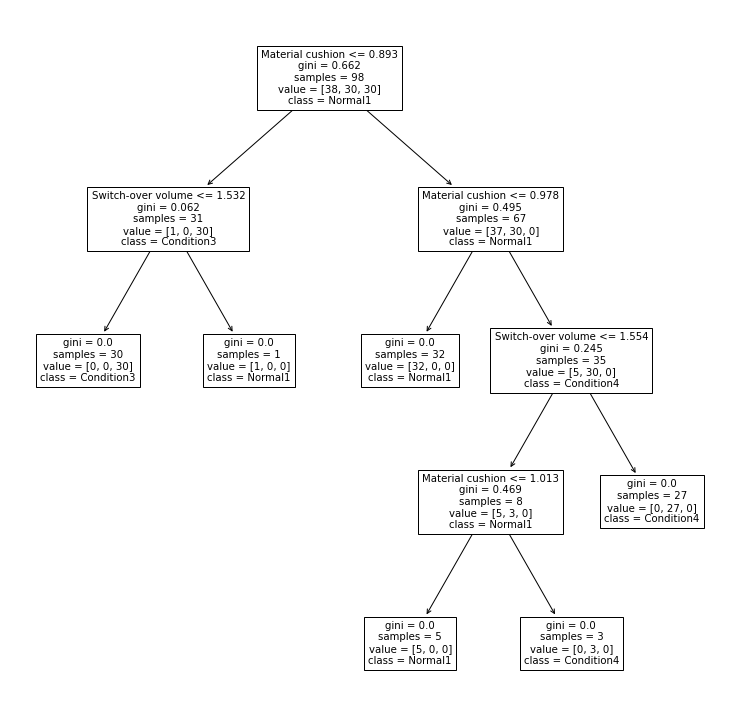

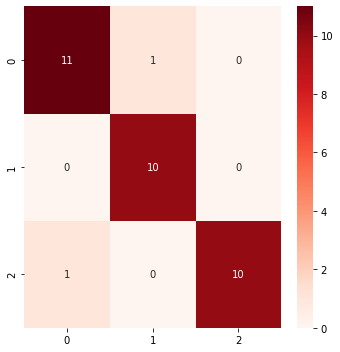

                            importance
Material cushion              0.895884
Switch-over volume            0.104116
Cylinder heating zone 1       0.000000
Cylinder heating zone 4       0.000000
Maximum injection pressure    0.000000
DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0, random_state=0)
training data length: 99
verification data length: 32
Accuracy: 0.91


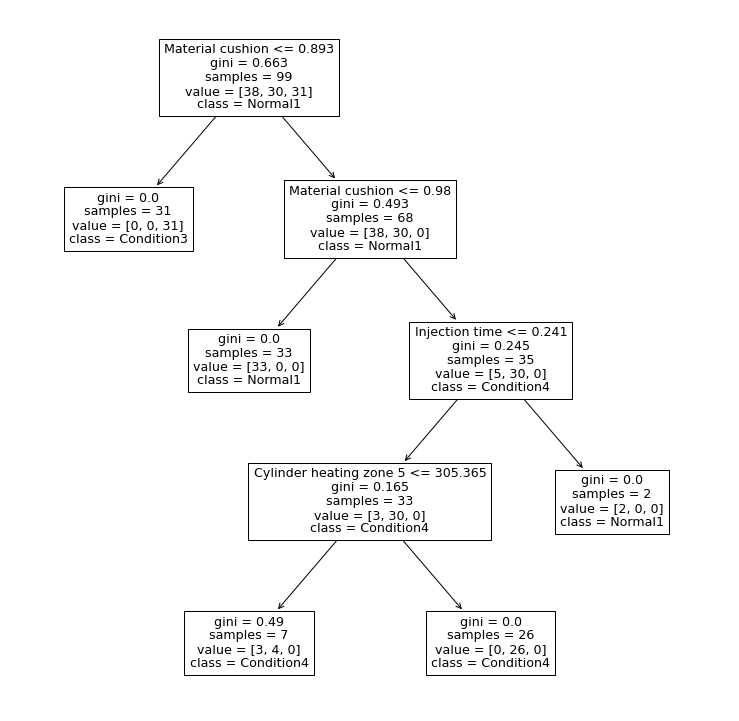

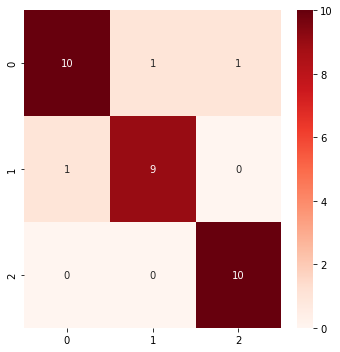

                         importance
Material cushion           0.917301
Injection time             0.050121
Cylinder heating zone 5    0.032578
Cylinder heating zone 1    0.000000
Cylinder heating zone 4    0.000000
DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0, random_state=0)


In [136]:
#define decision model
model_name = 'Decision Tree'
#model2 = dt(random_state=0)
decisiontree = dt(random_state=0, 
max_depth=4, 
min_samples_split=2, 
min_samples_leaf=1, 
max_leaf_nodes=None, 
min_impurity_decrease=0)
# Train model
decisionall = decisiontree.fit(condition_X, condition_y)

#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    
    #fit decision tree model and predict y_p
    decisionall.fit(X_tr, y_tr)
    y_p = decisionall.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    # plot and save Decision tree 
    fig = plt.figure(figsize=(13, 13))
    # plot tree
    tree.plot_tree(decisionall, feature_names=features ,  class_names=data , filled=False)
    plt.savefig(savePath + '/' + 'Condition_' + str(len(accuracy_l)) + 'decision_tree.png')
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Reds')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'Condition_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()

    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)
    feature_importances = pd.DataFrame(decisiontree.feature_importances_, index = condition_X.columns, columns=["importance"]).sort_values("importance",ascending=False)
    print(feature_importances[:5])
    topimportance = '|'.join(feature_importances.head(2).transpose())
    #https://stackoverflow.com/questions/63367951/filtering-pandas-dataframe-based-on-list-of-column-names
    print(decisionall)



In [137]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

Decision Tree score :  0.91
1.6005859375
Condition    0.029297
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [138]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("Decision tree Prediction confusion_matrix", "\n", a)
print("\n")
print("Decision tree Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

Decision tree Prediction confusion_matrix 
 [[10  1  1]
 [ 1  9  0]
 [ 0  0 10]]


Decision tree Prediction classification report 
               precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           3       0.90      0.90      0.90        10
           4       0.91      1.00      0.95        10

    accuracy                           0.91        32
   macro avg       0.91      0.91      0.91        32
weighted avg       0.91      0.91      0.90        32

Normal1_accuracy: 0.833
Condition4_accuracy: 0.9
Condition3_accuracy: 1.0


In [139]:
x = range(1,10)
list(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [140]:
#finding best parameter for decision tree
griddecision=dt(random_state=0)
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5),
    "min_impurity_decrease":[0,0.1,1]
}
grid = GridSearchCV(griddecision,param_grid=param_dict,cv=4,verbose=1,scoring='accuracy')
grid.fit(X_tr,y_tr)
print(grid.best_params_)
print(grid.best_estimator_)
# All results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(sorted(means,reverse=True), stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Fitting 4 folds for each of 1728 candidates, totalling 6912 fits
{'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0, random_state=0)
0.858 (+/-0.058) for {'criterion': 'gini', 'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.858 (+/-0.058) for {'criterion': 'gini', 'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.858 (+/-0.058) for {'criterion': 'gini', 'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.858 (+/-0.058) for {'criterion': 'gini', 'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.858 (+/-0.058) for {'criterion': 'gini', 'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.858 (+/-0.058) for {'criterion': 'gini', 'max_depth': 1, 'min_impurity_de

training data length: 98
verification data length: 33
Accuracy: 0.82


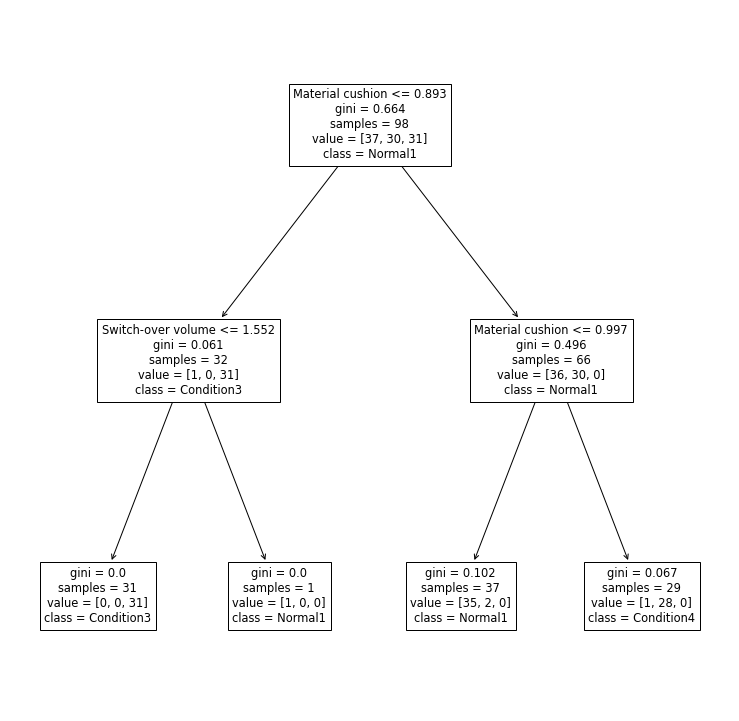

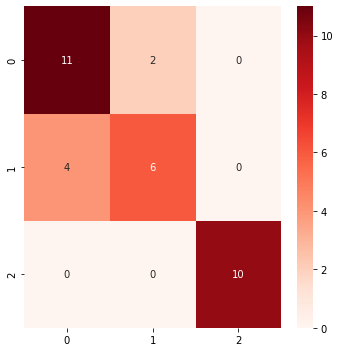

DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0, random_state=0)
training data length: 98
verification data length: 33
Accuracy: 0.94


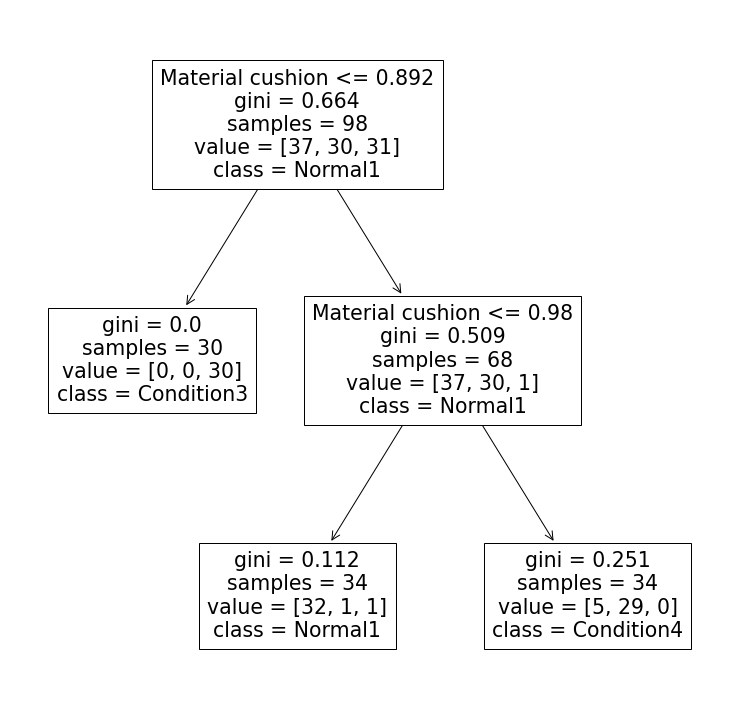

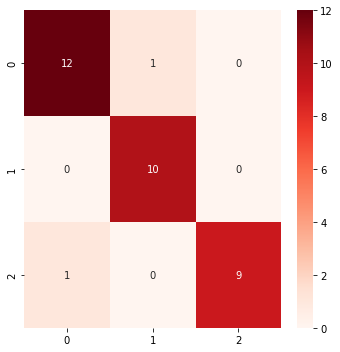

DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0, random_state=0)
training data length: 98
verification data length: 33
Accuracy: 0.88


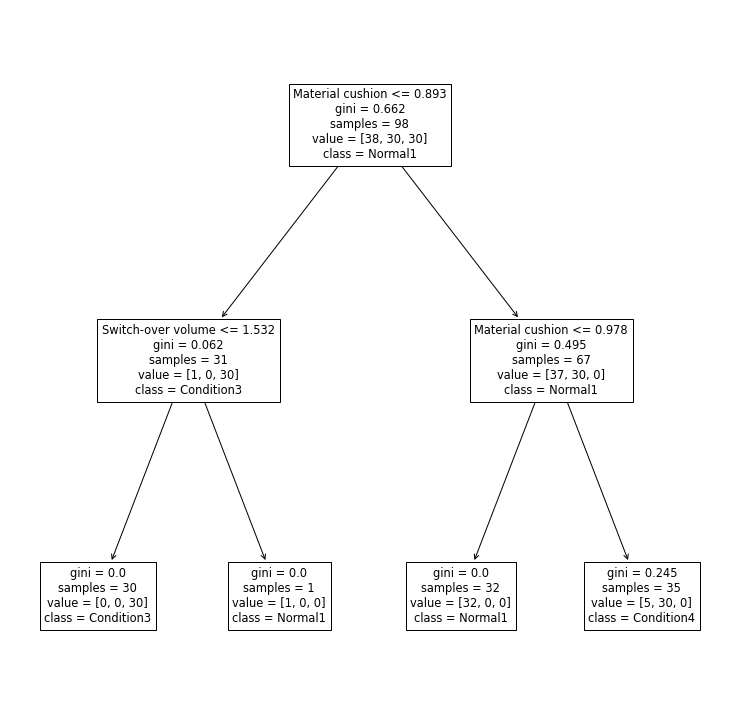

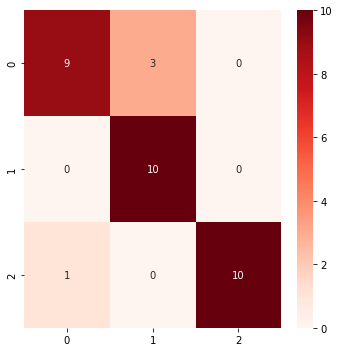

DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0, random_state=0)
training data length: 99
verification data length: 32
Accuracy: 0.91


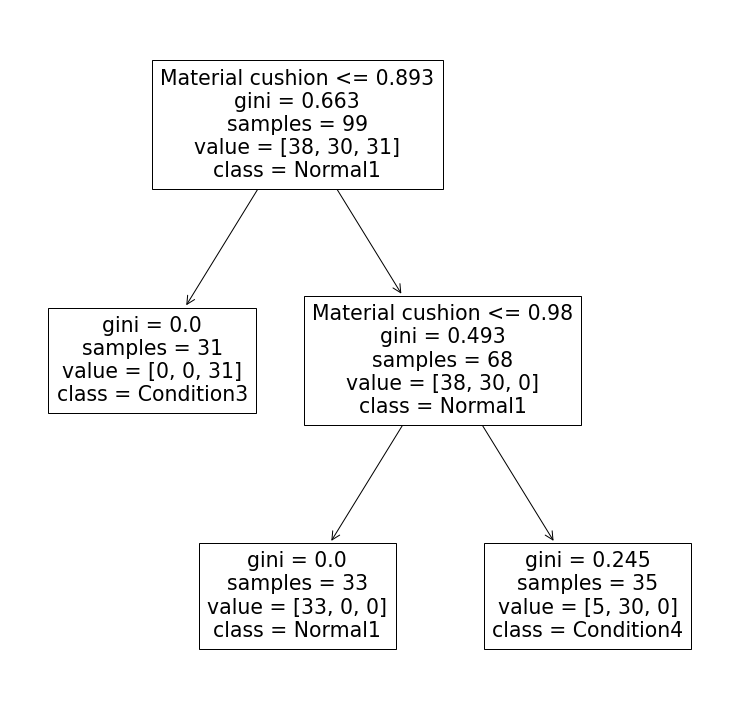

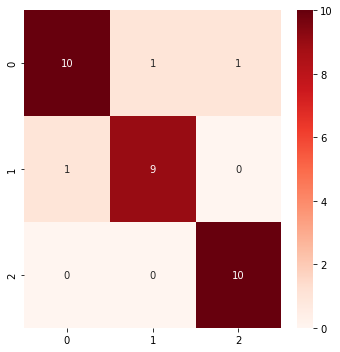

DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0, random_state=0)


In [141]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Load data
model_name = 'Decision Tree'
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']

#convrt to data frame 

X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#converting dataframe to numpy
features = condition_X.keys().to_numpy()
data = condition_y[~condition.duplicated('Condition')].to_numpy()
data = ["Normal1","Condition4","Condition3"]
features
#print(data)
#define decision model
model_name = 'Decision Tree'
#model2 = dt(random_state=0)
decisiontree = grid.best_estimator_
#decisiontree = dt(criterion='gini',max_depth=1,min_samples_leaf=1,min_samples_split=2)
# Train model
griddecisionall = decisiontree.fit(condition_X, condition_y)

#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    
    #fit decision tree model and predict y_p
    griddecisionall.fit(X_tr, y_tr)
    y_p = griddecisionall.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    # plot and save Decision tree 
    fig = plt.figure(figsize=(13, 13))
    # plot tree
    tree.plot_tree(griddecisionall, feature_names=features ,  class_names=data , filled=False)
    plt.savefig(savePath + '/' + 'Condition_' + str(len(accuracy_l)) + 'decision_tree.png')
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Reds')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'Condition_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()

    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)
    #https://stackoverflow.com/questions/63367951/filtering-pandas-dataframe-based-on-list-of-column-names
    print(griddecisionall)



In [142]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

Decision Tree score :  0.89
1.6005859375
Condition    0.029297
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [143]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("Decision tree Prediction confusion_matrix", "\n", a)
print("\n")
print("Decision tree Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

Decision tree Prediction confusion_matrix 
 [[10  1  1]
 [ 1  9  0]
 [ 0  0 10]]


Decision tree Prediction classification report 
               precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           3       0.90      0.90      0.90        10
           4       0.91      1.00      0.95        10

    accuracy                           0.91        32
   macro avg       0.91      0.91      0.91        32
weighted avg       0.91      0.91      0.90        32

Normal1_accuracy: 0.833
Condition4_accuracy: 0.9
Condition3_accuracy: 1.0


In [144]:
%%time
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Load data
model_name = 'Decision Tree'
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
# Create adaboost tree classifier object
adaboostgriddecisionall = AdaBoostClassifier(base_estimator=griddecisionall)
#model = adaboostgriddecisionall.fit(condition_X,condition_y)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
#param_grid = {'base_estimator__min_samples_split':range(2,5),
#         'base_estimator__min_samples_leaf':range(1,5),
#         'base_estimator__max_depth':range(2,5),'n_estimators': range(10,100,10),'learning_rate':[0.1,1]}
param_grid = {'n_estimators': range(10,100,10),'learning_rate':[0.1,0.2,0.3,0.4,1]}
#adaboostgriddecisionall = AdaBoostClassifier(n_estimators =10,base_estimator=griddecisionall, learning_rate=1.0, random_state=0)
gridadaboost = GridSearchCV(adaboostgriddecisionall, param_grid=param_grid)
gridadaboost.fit(X_tr,y_tr)
gridadaboost.best_estimator_


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

CPU times: total: 8.03 s
Wall time: 14.2 s


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_impurity_decrease=0,
                                                         random_state=0),
                   learning_rate=0.2, n_estimators=10)

In [145]:
gridadaboost.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01727064, 0.        , 0.        , 0.        , 0.17691672,
       0.32355483, 0.48225781])


 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.91
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.86      0.92      0.89        13
           3       0.89      0.80      0.84        10
           4       1.00      1.00      1.00        10

    accuracy                           0.91        33
   macro avg       0.92      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33


 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.91


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.86      0.92      0.89        13
           3       0.90      0.90      0.90        10
           4       1.00      0.90      0.95        10

    accuracy                           0.91        33
   macro avg       0.92      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33


 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.97
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        11

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 0.94
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           3       0.91      1.00      0.95        10
           4       0.91      1.00      0.95        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



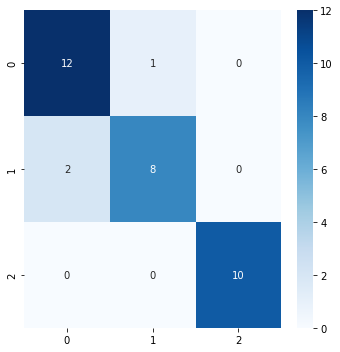

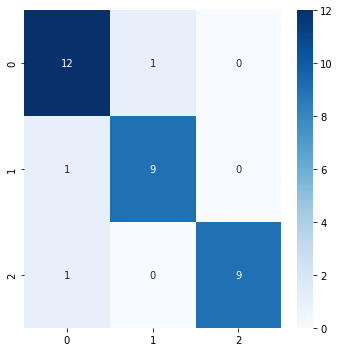

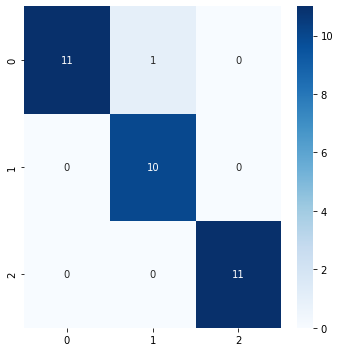

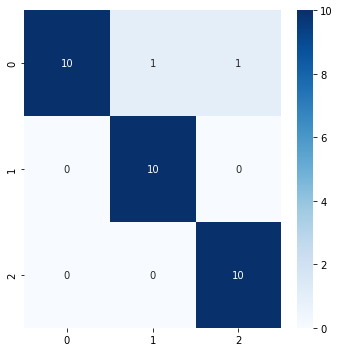

In [146]:
#Example 3 AdaBoostClassifier
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Load data
model_name = 'Decision Tree'
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
# Create adaboost tree classifier object
decisiontree = dt(criterion='entropy',max_depth=3,min_samples_leaf=4)
adaboostgriddecisionall = AdaBoostClassifier(base_estimator=decisiontree,learning_rate=0.2, n_estimators=10)
model = adaboostgriddecisionall.fit(condition_X,condition_y)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    model = adaboostgriddecisionall.fit(X_tr, y_tr)
    y_p = model.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  Confusion matrix and classification report
 
    print("Adaboost Prediction report", "\n", classification_report(y_v,y_p))
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'adaboost_' + str(len(accuracy_l)) + 'confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)


In [147]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

Decision Tree score :  0.93
1.5146484375
Condition    0.130859
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [148]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("Random Forest Prediction confusion_matrix", "\n", a)
print("\n")
print("Random Forest Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

Random Forest Prediction confusion_matrix 
 [[10  1  1]
 [ 0 10  0]
 [ 0  0 10]]


Random Forest Prediction classification report 
               precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           3       0.91      1.00      0.95        10
           4       0.91      1.00      0.95        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32

Normal1_accuracy: 0.833
Condition4_accuracy: 1.0
Condition3_accuracy: 1.0


In [149]:
#Decision tree method with 2 features

In [150]:
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']

#print(condition_X)

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#condition
print(X)
#print(y)
#print("data length:", len(y))
#print("data length:", len(X))

     Cylinder heating zone 1  Cylinder heating zone 4  \
0                     271.52               316.140000   
1                     271.19               320.240000   
2                     283.09               307.250000   
3                     269.67               298.810000   
4                     290.22               312.940000   
..                       ...                      ...   
126                   287.71               315.920000   
127                   277.99               309.604054   
128                   268.84               311.970000   
129                   288.93               304.010000   
130                   286.02               310.980000   

     Maximum injection pressure  Mould temperature control unit 1  Cycle time  \
0                       1506.14                             92.63      29.860   
1                       1452.35                             91.95      30.138   
2                       1474.93                             87.64      2

In [151]:
#converting dataframe to numpy
features = condition_X.keys().to_numpy()
#data = condition_y.to_numpy()
data = condition_y[~condition.duplicated('Condition')].to_numpy()
data = ["Normal1","Condition4","Condition3"]
features
#print(data)

array(['Cylinder heating zone 1', 'Cylinder heating zone 4',
       'Maximum injection pressure', 'Mould temperature control unit 1',
       'Cycle time', 'Cylinder heating zone 5', 'Injection time',
       'Cylinder heating zone 2', 'Dosage time',
       'Cylinder heating zone 3', 'Switch-over volume',
       'Material cushion'], dtype=object)

training data length: 98
verification data length: 33
Accuracy: 0.82


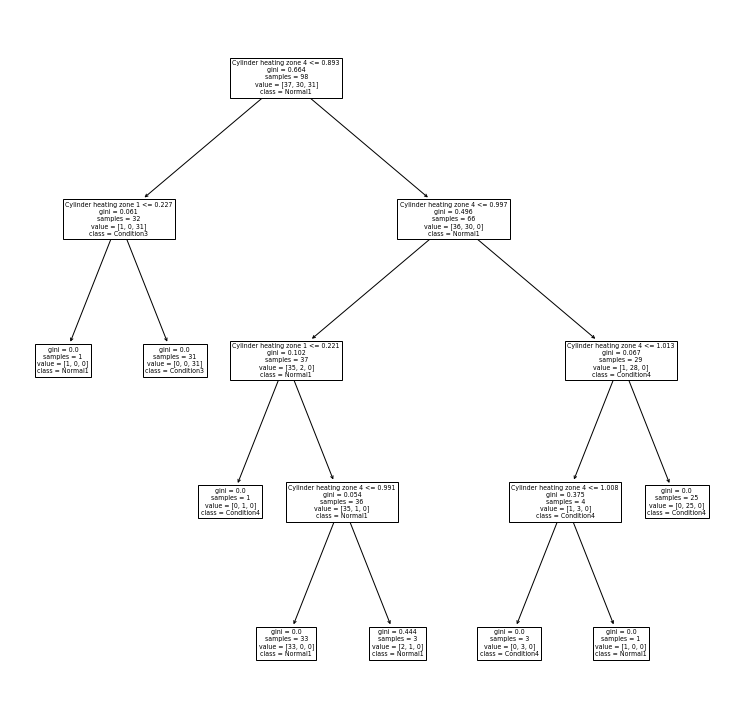

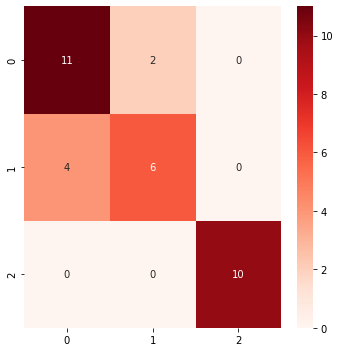

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please us

training data length: 98
verification data length: 33
Accuracy: 0.94


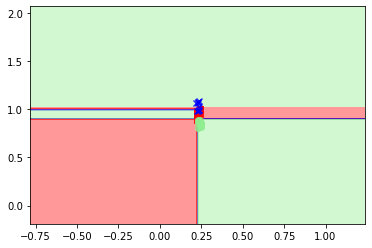

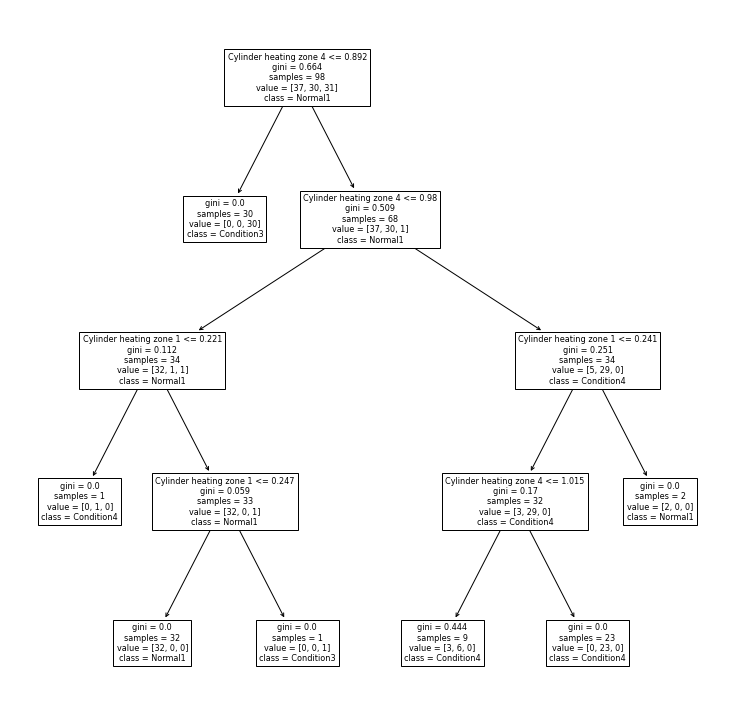

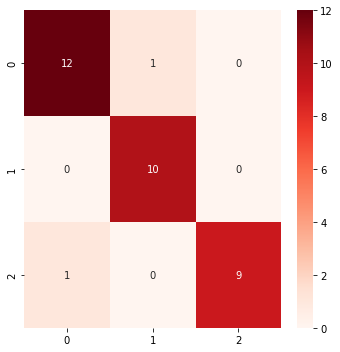

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please us

training data length: 98
verification data length: 33
Accuracy: 0.91


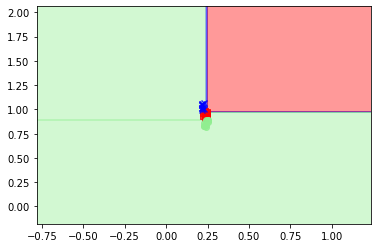

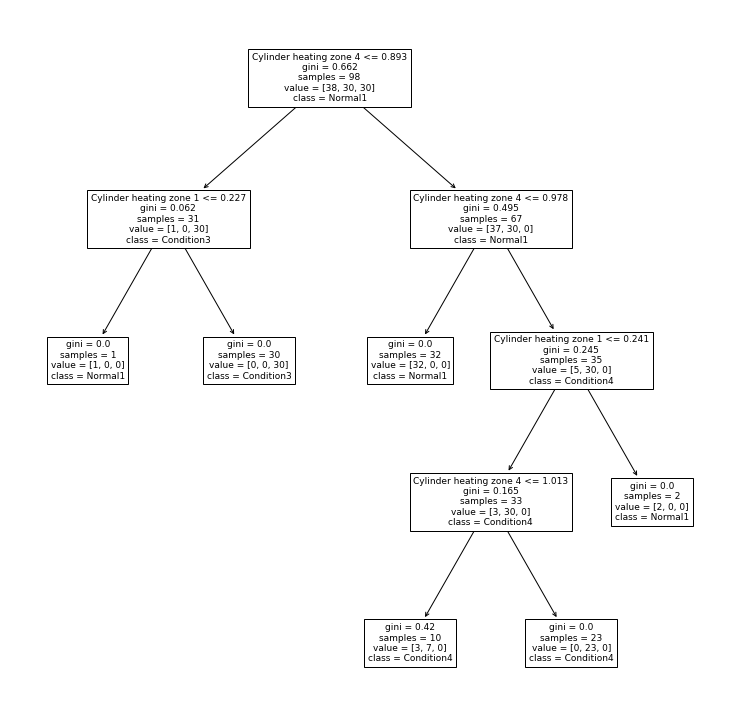

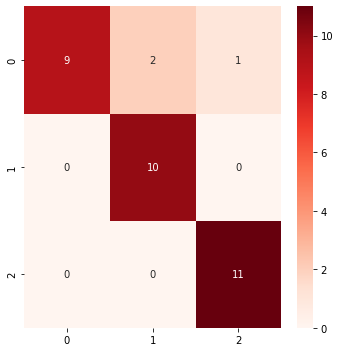

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please us

training data length: 99
verification data length: 32
Accuracy: 0.91


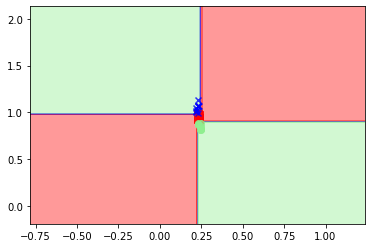

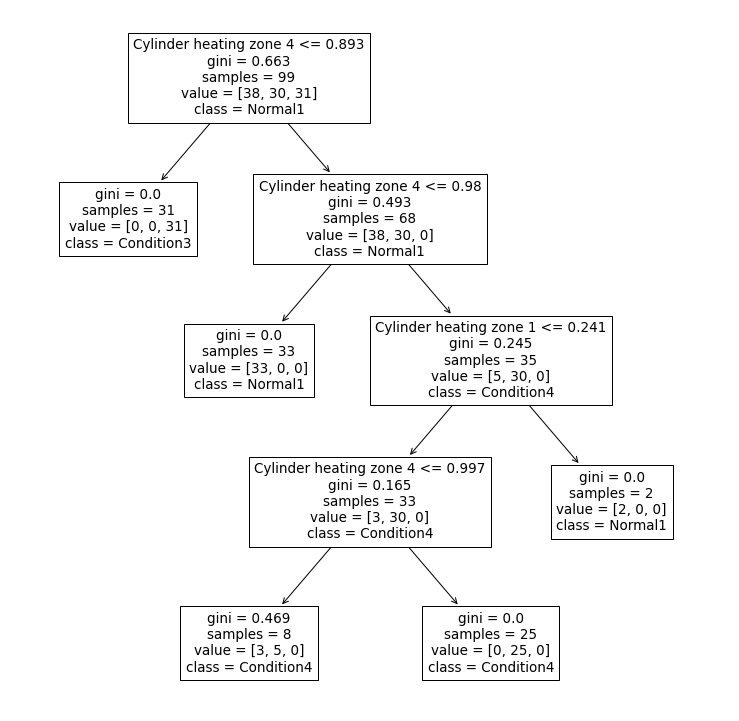

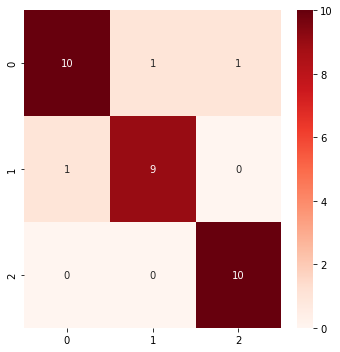

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please us

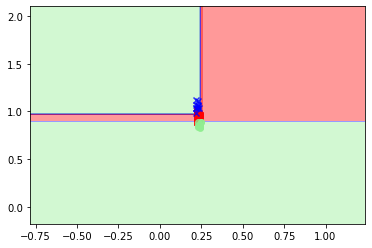

In [152]:
#define decision model
model_name = 'Decision Tree'
#model2 = dt(random_state=0)
decisiontree = dt(random_state=0, 
max_depth=4, 
min_samples_split=2, 
min_samples_leaf=1, 
max_leaf_nodes=None, 
min_impurity_decrease=0)
# Train model
decision2 = decisiontree.fit(condition_X.filter(regex=topimportance), condition_y)

#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_v=X.filter(regex=topimportance).iloc[te_i]
    X_tr=X.filter(regex=topimportance).iloc[tr_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    
    #fit decision tree model and predict y_p
    decision2.fit(X_tr, y_tr)
    y_p = decision2.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    # plot and save Decision tree 
    fig = plt.figure(figsize=(13, 13))
    # plot tree
    tree.plot_tree(decision2, feature_names=features ,  class_names=data , filled=False)
    plt.savefig(savePath + '/' + 'Condition_' + str(len(accuracy_l)) + 'decision_tree.png')
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Reds')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'Condition_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()

    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)
    #feature_importances = pd.DataFrame(decisiontree.feature_importances_, index = condition_X.columns, columns=["importance"]).sort_values("importance",ascending=False)
    #print(feature_importances[:5])
    #https://stackoverflow.com/questions/63367951/filtering-pandas-dataframe-based-on-list-of-column-names
    
    #mask_pattrn = '|'.join(feature_importances.head(2).transpose())
    #X_v=condition_X.filter(regex=mask_pattrn)
    #X_v=X.filter(regex=mask_pattrn).iloc[te_i]
    #X_tr=X.filter(regex=mask_pattrn).iloc[tr_i]
    #model3 = decisiontree.fit(condition_X.filter(regex=mask_pattrn), condition_y)
    #print(X_v)
     

    #X_v=condition_X.filter(regex=mask_pattrn)
    plot_decision_regions(X_v.to_numpy(), y_v.values.flatten(), decision2)



In [153]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

Decision Tree score :  0.89
1.6005859375
Condition    0.029297
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [154]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("Decision tree Prediction confusion_matrix", "\n", a)
print("\n")
print("Decision tree Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

Decision tree Prediction confusion_matrix 
 [[10  1  1]
 [ 1  9  0]
 [ 0  0 10]]


Decision tree Prediction classification report 
               precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           3       0.90      0.90      0.90        10
           4       0.91      1.00      0.95        10

    accuracy                           0.91        32
   macro avg       0.91      0.91      0.91        32
weighted avg       0.91      0.91      0.90        32

Normal1_accuracy: 0.833
Condition4_accuracy: 0.9
Condition3_accuracy: 1.0


In [155]:
#Randomforest

In [156]:
# Load data
model_name = 'Random Forest'
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']

#print(condition_X)

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#condition
print(X)
#print(y)
#print("data length:", len(y))
#print("data length:", len(X))

     Cylinder heating zone 1  Cylinder heating zone 4  \
0                     271.52               316.140000   
1                     271.19               320.240000   
2                     283.09               307.250000   
3                     269.67               298.810000   
4                     290.22               312.940000   
..                       ...                      ...   
126                   287.71               315.920000   
127                   277.99               309.604054   
128                   268.84               311.970000   
129                   288.93               304.010000   
130                   286.02               310.980000   

     Maximum injection pressure  Mould temperature control unit 1  Cycle time  \
0                       1506.14                             92.63      29.860   
1                       1452.35                             91.95      30.138   
2                       1474.93                             87.64      2


 iteration: 1
training data length: 98
verification data length: 33


C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\3549171344.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomall.fit(X_tr, y_tr)


Accuracy: 0.91
RF Prediction report 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           3       1.00      0.70      0.82        10
           4       1.00      1.00      1.00        10

    accuracy                           0.91        33
   macro avg       0.94      0.90      0.91        33
weighted avg       0.93      0.91      0.91        33



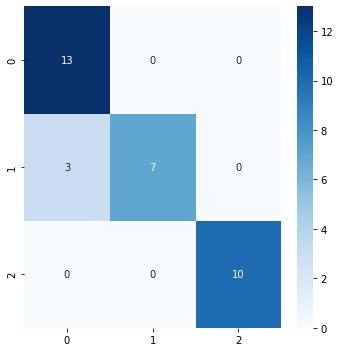

RandomForestClassifier(max_depth=8, n_estimators=50, n_jobs=-1, random_state=0)

 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.94
RF Prediction report 
               precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           3       1.00      0.80      0.89        10
           4       1.00      1.00      1.00        10

    accuracy                           0.94        33
   macro avg       0.96      0.93      0.94        33
weighted avg       0.95      0.94      0.94        33



C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\3549171344.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomall.fit(X_tr, y_tr)


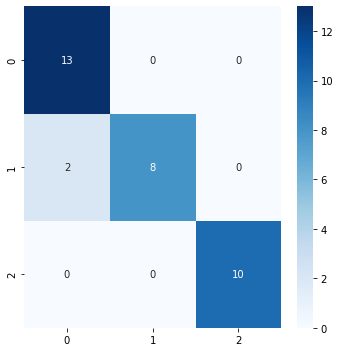

RandomForestClassifier(max_depth=8, n_estimators=50, n_jobs=-1, random_state=0)

 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.97
RF Prediction report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        11

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\3549171344.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomall.fit(X_tr, y_tr)


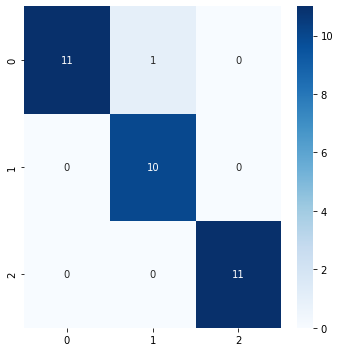

RandomForestClassifier(max_depth=8, n_estimators=50, n_jobs=-1, random_state=0)

 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 0.97
RF Prediction report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\3549171344.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomall.fit(X_tr, y_tr)


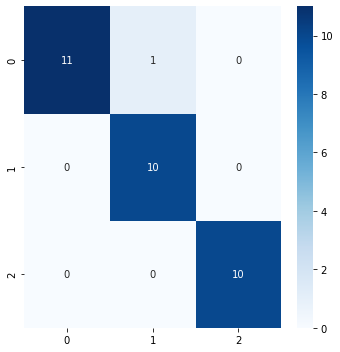

RandomForestClassifier(max_depth=8, n_estimators=50, n_jobs=-1, random_state=0)


In [157]:
# Create random forest classifier object
randomall = RandomForestClassifier(n_estimators = 50,max_depth=8, criterion = 'gini', random_state=0, n_jobs=-1)

#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    randomall.fit(X_tr, y_tr)
    y_p = randomall.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  classification report
    print("RF Prediction report", "\n", classification_report(y_v,y_p))
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    #plt.savefig(savePath + '/' + '2featurerandom_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    #result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)
    print(randomall)

In [158]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

Random Forest score :  0.95
1.546875
Condition    0.078125
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [159]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("Random Forest Prediction confusion_matrix", "\n", a)
print("\n")
print("Random Forest Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

Random Forest Prediction confusion_matrix 
 [[11  1  0]
 [ 0 10  0]
 [ 0  0 10]]


Random Forest Prediction classification report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

Normal1_accuracy: 0.917
Condition4_accuracy: 1.0
Condition3_accuracy: 1.0


In [160]:
# For a new observation
observation =[condition_X.iloc[1].values.flatten().tolist()]

# Predict observation's class
y = randomall.predict(observation)
print("prediction class:", y)

prediction class: [1]


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Feature names: ['Material cushion', 'Switch-over volume', 'Injection time', 'Maximum injection pressure', 'Dosage time', 'Mould temperature control unit 1', 'Cylinder heating zone 5', 'Cylinder heating zone 1', 'Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cycle time', 'Cylinder heating zone 4']
Feature importance: [0.35797988 0.21704141 0.10187245 0.06461209 0.04884532 0.03850218
 0.03839182 0.03178667 0.03142791 0.02750076 0.02464939 0.01739012]


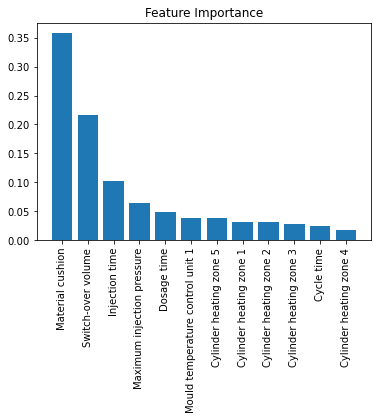

In [161]:
#Example 2 - Identifying Important Features in Random Forests
# Calculate feature importances
feature_names = condition_X.keys().to_numpy()
features = condition_X
target = condition_y
importances = randomall.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
#print("indices:", indices)

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]
print("Feature names:", names)
print("Feature importance:", importances[indices])

#Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(features.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [162]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state = 0)
# Number of trees in random forest
n_estimators = range(10, 100, 10)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = range(1, 10)
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = range(2, 5)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1, 5)
# Method of selecting samples for training each tree
bootstrap = [True]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'criterion':['gini','entropy']}


In [163]:
%%time
from sklearn.model_selection import GridSearchCV
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 4, verbose=2, n_jobs = -1)
rf_random.fit(X_tr, y_tr)
print(rf_random.best_params_)
print(rf_random.best_estimator_)
means = rf_random.cv_results_['mean_test_score']
stds = rf_random.cv_results_['std_test_score']
for mean, std, params in zip(sorted(means,reverse=True), stds, rf_random.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Fitting 4 folds for each of 3888 candidates, totalling 15552 fits


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=20,
                       random_state=0)
0.949 (+/-0.093) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
0.949 (+/-0.068) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
0.949 (+/-0.044) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
0.949 (+/-0.134) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
0.949 (+/-0.166) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.949

In [164]:
# Load data
model_name = 'Random Forest'
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']

#print(condition_X)

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#condition
#print(X)
#print(y)
#print("data length:", len(y))
#print("data length:", len(X))


 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.85
RF Prediction report 
               precision    recall  f1-score   support

           1       0.79      0.85      0.81        13
           3       0.78      0.70      0.74        10
           4       1.00      1.00      1.00        10

    accuracy                           0.85        33
   macro avg       0.85      0.85      0.85        33
weighted avg       0.85      0.85      0.85        33



C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\2796969582.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  gridrandomall.fit(X_tr, y_tr)


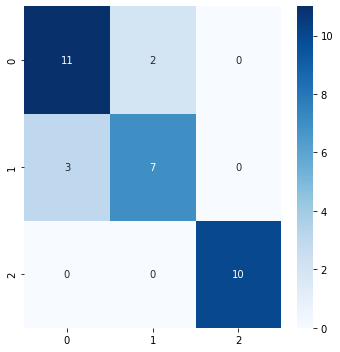

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=20,
                       random_state=0)

 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.91
RF Prediction report 
               precision    recall  f1-score   support

           1       0.86      0.92      0.89        13
           3       0.89      0.80      0.84        10
           4       1.00      1.00      1.00        10

    accuracy                           0.91        33
   macro avg       0.92      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33



C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\2796969582.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  gridrandomall.fit(X_tr, y_tr)


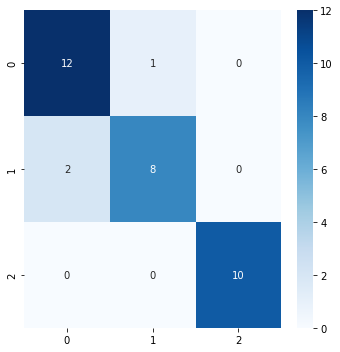

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=20,
                       random_state=0)

 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.94
RF Prediction report 
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           3       0.91      1.00      0.95        10
           4       1.00      0.91      0.95        11

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\2796969582.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  gridrandomall.fit(X_tr, y_tr)


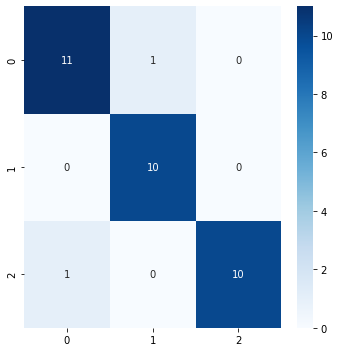

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=20,
                       random_state=0)

 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 0.94
RF Prediction report 
               precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           3       0.91      1.00      0.95        10
           4       0.91      1.00      0.95        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\2796969582.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  gridrandomall.fit(X_tr, y_tr)


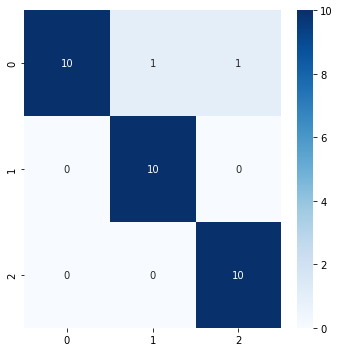

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=20,
                       random_state=0)


In [165]:
# Create random forest classifier object
gridrandomall = rf_random.best_estimator_
#gridrandomall = RandomForestClassifier(max_depth=1,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=10)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    gridrandomall.fit(X_tr, y_tr)
    y_p = gridrandomall.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  classification report
    print("RF Prediction report", "\n", classification_report(y_v,y_p))
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + '2featurerandom_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)
    print(gridrandomall)

In [166]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

Random Forest score :  0.91
1.5146484375
Condition    0.130859
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [167]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("Random Forest Prediction confusion_matrix", "\n", a)
print("\n")
print("Random Forest Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

Random Forest Prediction confusion_matrix 
 [[10  1  1]
 [ 0 10  0]
 [ 0  0 10]]


Random Forest Prediction classification report 
               precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           3       0.91      1.00      0.95        10
           4       0.91      1.00      0.95        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32

Normal1_accuracy: 0.833
Condition4_accuracy: 1.0
Condition3_accuracy: 1.0


In [168]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Load data
model_name = 'Random Forest'
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
# Create adaboost tree classifier object
adaboostgridrandomall = AdaBoostClassifier(base_estimator=gridrandomall)
#model = adaboostgriddecisionall.fit(condition_X,condition_y)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
param_grid = {'n_estimators': range(10,100,10),'learning_rate':[0.1,0.2,0.3,0.4,1]}
#adaboostgriddecisionall = AdaBoostClassifier(n_estimators =10,base_estimator=griddecisionall, learning_rate=1.0, random_state=0)
gridadaboost = GridSearchCV(adaboostgridrandomall, param_grid=param_grid)
gridadaboost.fit(X_tr,y_tr)
gridadaboost.best_estimator_

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         max_depth=7,
                                                         n_estimators=20,
                                                         random_state=0),
                   learning_rate=0.2, n_estimators=70)


 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.91
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           3       1.00      0.70      0.82        10
           4       1.00      1.00      1.00        10

    accuracy                           0.91        33
   macro avg       0.94      0.90      0.91        33
weighted avg       0.93      0.91      0.91        33


 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.94
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           3       1.00      0.80      0.89        10
           4       1.00      1.00      1.00        10

    accuracy                           0.94        33
   macro avg       0.96      0.93      0.94        33
weighted avg       0.95      0.94      0.94        33



C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.97
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        10
           4       0.92      1.00      0.96        11

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33


 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 0.94


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           3       1.00      0.90      0.95        10
           4       0.91      1.00      0.95        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



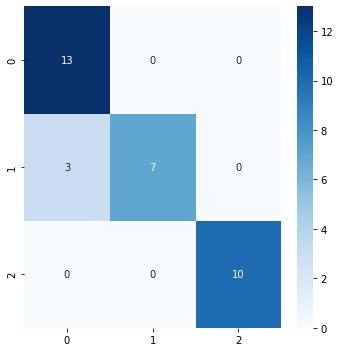

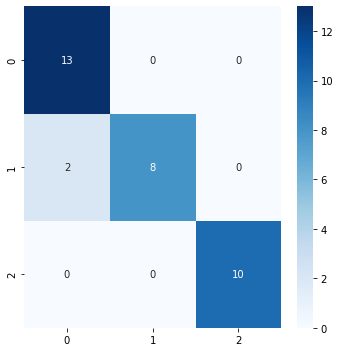

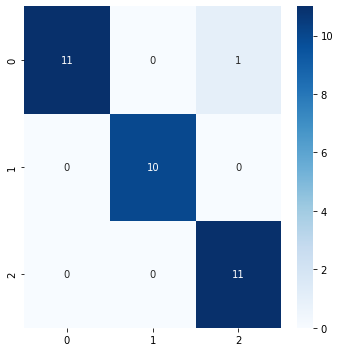

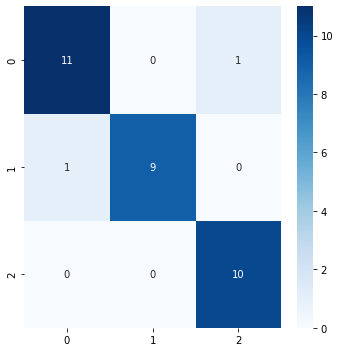

In [169]:
#Example 3 AdaBoostClassifier
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Load data
model_name = 'Random Forest'
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
# Create adaboost tree classifier object
#randomall = RandomForestClassifier(max_depth=3,min_samples_leaf=4,n_estimators=90,random_state=42)
#adaboostrandomall = AdaBoostClassifier(base_estimator=randomall,learning_rate=0.1,n_estimators=30)
#model = adaboostrandomall.fit(condition_X,condition_y)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    model = gridadaboost.best_estimator_.fit(X_tr, y_tr)
    y_p = model.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  Confusion matrix and classification report
 
    print("Adaboost Prediction report", "\n", classification_report(y_v,y_p))
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'adaboost_' + str(len(accuracy_l)) + 'confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)


In [170]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

Random Forest score :  0.94
1.6787109375
Condition   -0.056641
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [171]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("Random Forest Prediction confusion_matrix", "\n", a)
print("\n")
print("Random Forest Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

Random Forest Prediction confusion_matrix 
 [[11  0  1]
 [ 1  9  0]
 [ 0  0 10]]


Random Forest Prediction classification report 
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           3       1.00      0.90      0.95        10
           4       0.91      1.00      0.95        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32

Normal1_accuracy: 0.917
Condition4_accuracy: 0.9
Condition3_accuracy: 1.0


In [172]:
#Randomforest with 2 features

In [173]:
#Example 2- select features: 
# Load libraries
from sklearn.feature_selection import SelectFromModel

# Create object that selects features with importance greater
# than or equal to a threshold
#selector = SelectFromModel(model2, threshold=0.3)
selector2 = SelectFromModel(randomall, threshold=0.2)
selector4 = SelectFromModel(randomall,threshold=0.046)
# create new feature matrix using selector
features_important2= selector2.fit_transform(condition_X, condition_y)
features_important4=selector4.fit_transform(condition_X, condition_y)
print(selector2)
print(features_important2)
print(features_important4)

SelectFromModel(estimator=RandomForestClassifier(max_depth=8, n_estimators=50,
                                                 n_jobs=-1, random_state=0),
                threshold=0.2)
[[1.48334    0.958447  ]
 [1.36334    0.959772  ]
 [1.38334    0.919388  ]
 [1.51334    0.936952  ]
 [1.51163787 0.95239662]
 [1.53334    0.892977  ]
 [1.39334    0.946375  ]
 [1.65334    0.955242  ]
 [1.58334    0.942977  ]
 [1.54334    0.89411   ]
 [1.36334    0.917315  ]
 [1.44334    0.920905  ]
 [1.47334    0.90411   ]
 [1.44334    0.9477    ]
 [1.49334    0.944132  ]
 [1.46334    0.969772  ]
 [1.61334    0.972037  ]
 [1.56334    0.892037  ]
 [1.39334    1.010734  ]
 [1.52334    0.931097  ]
 [1.42334    0.961097  ]
 [1.54334    0.95239662]
 [1.63334    0.996952  ]
 [1.46334    0.96223   ]
 [1.34334    0.969217  ]
 [1.51163787 0.96676   ]
 [1.60334    0.967892  ]
 [1.36334    0.947892  ]
 [1.51334    0.987529  ]
 [1.58334    0.978085  ]
 [1.44334    1.007144  ]
 [1.67334    0.930157  ]
 [1.71334    

In [174]:
from sklearn.feature_selection import RFECV
rfe = RFECV(randomall,cv=4,scoring="accuracy") 
rfe.fit(X_tr,y_tr)
print(rfe.support_)
features

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1

[False False False False False False  True False False False  True  True]


Cylinder heating zone 1  Cylinder heating zone 4  \
0                     271.52               316.140000   
1                     271.19               320.240000   
2                     283.09               307.250000   
3                     269.67               298.810000   
4                     290.22               312.940000   
..                       ...                      ...   
126                   287.71               315.920000   
127                   277.99               309.604054   
128                   268.84               311.970000   
129                   288.93               304.010000   
130                   286.02               310.980000   

     Maximum injection pressure  Mould temperature control unit 1  Cycle time  \
0                       1506.14                             92.63      29.860   
1                       1452.35                             91.95      30.138   
2                       1474.93                             87.64      28.566   
3                       1546.73                             94.44      27.786   
4                       1598.14                             94.31      29.836   
..                          ...                               ...         ...   
126                     1609.08                             91.61      29.406   
127                     1535.26                             88.95      29.768   
128                     1526.63                             91.04      29.418   
129                     1475.82                             89.96      29.208   
130                     1559.94                             85.80      30.268   

     Cylinder heating zone 5  Injection time  Cylinder heating zone 2  \
0                     317.33           0.234                   300.76   
1                     302.82           0.234                   301.67   
2                     306.27           0.234                   286.21   
3                     318.56           0.224                   285.23   
4                     324.73           0.244                   302.07   
..                       ...             ...                      ...   
126                   325.23           0.228                   303.94   
127                   313.96           0.238                   297.07   
128                   322.40           0.228                   300.23   
129                   320.37           0.238                   309.84   
130                   322.77           0.228                   287.57   

     Dosage time  Cylinder heating zone 3  Switch-over volume  \
0          2.986                   313.86            1.483340   
1          3.008                   299.54            1.363340   
2          3.098                   309.44            1.383340   
3          3.048                   306.52            1.513340   
4          2.998                   310.10            1.511638   
..           ...                      ...                 ...   
126        2.824                   308.70            1.683970   
127        2.896                   322.40            1.603970   
128        2.916                   295.28            1.873970   
129        3.016                   313.65            1.633970   
130        2.746                   301.75            1.863970   

     Material cushion  
0            0.958447  
1            0.959772  
2            0.919388  
3            0.936952  
4            0.952397  
..                ...  
126          1.034150  
127          0.991890  
128          1.071890  
129          0.995290  
130          0.993960  

[131 rows x 12 columns]

In [175]:
sfm = SelectFromModel(estimator=randomall, threshold='mean') # threshold of selection is mean of feature importances by random forest classifier
sfm.fit(X_tr, y_tr)
selected_xtrain = sfm.transform(X_tr)
selected_xtrain

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\feature_selection\_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


array([[0.234     , 1.48334   , 0.958447  ],
       [0.234     , 1.36334   , 0.959772  ],
       [0.234     , 1.38334   , 0.919388  ],
       [0.244     , 1.51163787, 0.95239662],
       [0.244     , 1.53334   , 0.892977  ],
       [0.244     , 1.65334   , 0.955242  ],
       [0.234     , 1.58334   , 0.942977  ],
       [0.224     , 1.54334   , 0.89411   ],
       [0.234     , 1.36334   , 0.917315  ],
       [0.224     , 1.44334   , 0.920905  ],
       [0.244     , 1.47334   , 0.90411   ],
       [0.244     , 1.44334   , 0.9477    ],
       [0.244     , 1.49334   , 0.944132  ],
       [0.224     , 1.46334   , 0.969772  ],
       [0.234     , 1.61334   , 0.972037  ],
       [0.224     , 1.52334   , 0.931097  ],
       [0.244     , 1.42334   , 0.961097  ],
       [0.244     , 1.54334   , 0.95239662],
       [0.234     , 1.63334   , 0.996952  ],
       [0.224     , 1.46334   , 0.96223   ],
       [0.234     , 1.51163787, 0.96676   ],
       [0.224     , 1.36334   , 0.947892  ],
       [0.

In [176]:
sfm = SelectFromModel(randomall, threshold='mean') # threshold of selection is mean of feature importances by random forest classifier
selected_xtrain = sfm.fit_transform(condition_X,condition_y)
selected_xtrain

array([[0.234     , 1.48334   , 0.958447  ],
       [0.234     , 1.36334   , 0.959772  ],
       [0.234     , 1.38334   , 0.919388  ],
       [0.224     , 1.51334   , 0.936952  ],
       [0.244     , 1.51163787, 0.95239662],
       [0.244     , 1.53334   , 0.892977  ],
       [0.23357447, 1.39334   , 0.946375  ],
       [0.244     , 1.65334   , 0.955242  ],
       [0.234     , 1.58334   , 0.942977  ],
       [0.224     , 1.54334   , 0.89411   ],
       [0.234     , 1.36334   , 0.917315  ],
       [0.224     , 1.44334   , 0.920905  ],
       [0.244     , 1.47334   , 0.90411   ],
       [0.244     , 1.44334   , 0.9477    ],
       [0.244     , 1.49334   , 0.944132  ],
       [0.224     , 1.46334   , 0.969772  ],
       [0.234     , 1.61334   , 0.972037  ],
       [0.224     , 1.56334   , 0.892037  ],
       [0.224     , 1.39334   , 1.010734  ],
       [0.224     , 1.52334   , 0.931097  ],
       [0.244     , 1.42334   , 0.961097  ],
       [0.244     , 1.54334   , 0.95239662],
       [0.

In [177]:
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = features_important2
#condition_X = selected_xtrain
#condition_X = condition.iloc[:,condition.columns != 'Condition']

condition_y = condition['Condition']

#print(condition_X)

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#condition
print(X)
#print(y)
#print("data length:", len(y))
#print("data length:", len(X))

            0         1
0    1.483340  0.958447
1    1.363340  0.959772
2    1.383340  0.919388
3    1.513340  0.936952
4    1.511638  0.952397
..        ...       ...
126  1.683970  1.034150
127  1.603970  0.991890
128  1.873970  1.071890
129  1.633970  0.995290
130  1.863970  0.993960

[131 rows x 2 columns]



 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.94
RF Prediction report 
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           3       0.90      0.90      0.90        10
           4       1.00      1.00      1.00        10

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\3570466044.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random2.fit(X_tr, y_tr)


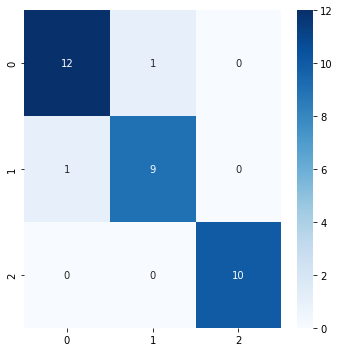


 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.97
RF Prediction report 
               precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        10

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\3570466044.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random2.fit(X_tr, y_tr)


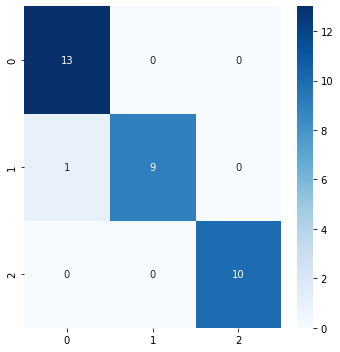


 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.97
RF Prediction report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        11

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\3570466044.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random2.fit(X_tr, y_tr)


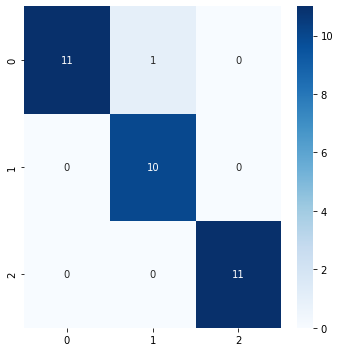


 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 0.97
RF Prediction report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\3570466044.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random2.fit(X_tr, y_tr)


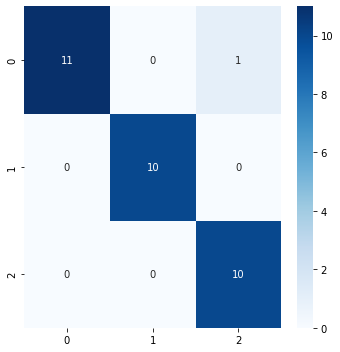

In [178]:
# Create random forest classifier object
random2 = RandomForestClassifier(n_estimators = 50, criterion = 'gini', random_state=0, n_jobs=-1)

#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    random2.fit(X_tr, y_tr)
    y_p = random2.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  classification report
    print("RF Prediction report", "\n", classification_report(y_v,y_p))
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + '2featurerandom_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)
    #plot_decision_regions(X_v.to_numpy(), y_v.values.flatten(), random2)


In [179]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

Random Forest score :  0.96
1.6005859375
Condition    0.029297
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [180]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("Random Forest Prediction confusion_matrix", "\n", a)
print("\n")
print("Random Forest Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

Random Forest Prediction confusion_matrix 
 [[11  0  1]
 [ 0 10  0]
 [ 0  0 10]]


Random Forest Prediction classification report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

Normal1_accuracy: 0.917
Condition4_accuracy: 1.0
Condition3_accuracy: 1.0


In [181]:
#Randomforest with 4 features

In [182]:
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = features_important4
condition_y = condition['Condition']

#print(condition_X)

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)


 iteration: 1
training data length: 98
verification data length: 33


C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\2383499979.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random4.fit(X_tr, y_tr)


Accuracy: 0.94
RF Prediction report 
               precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           3       1.00      0.80      0.89        10
           4       1.00      1.00      1.00        10

    accuracy                           0.94        33
   macro avg       0.96      0.93      0.94        33
weighted avg       0.95      0.94      0.94        33


 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.97
RF Prediction report 
               precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        10

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\2383499979.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random4.fit(X_tr, y_tr)



 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.94
RF Prediction report 
               precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           3       0.91      1.00      0.95        10
           4       0.92      1.00      0.96        11

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\2383499979.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random4.fit(X_tr, y_tr)



 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 0.97
RF Prediction report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



C:\Users\lolif\AppData\Local\Temp\ipykernel_10656\2383499979.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random4.fit(X_tr, y_tr)


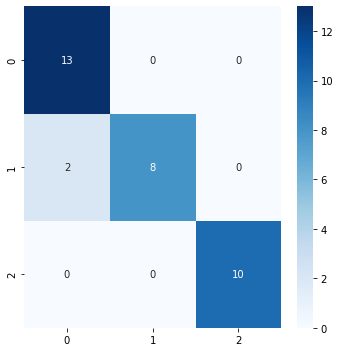

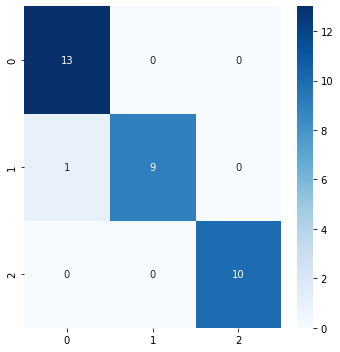

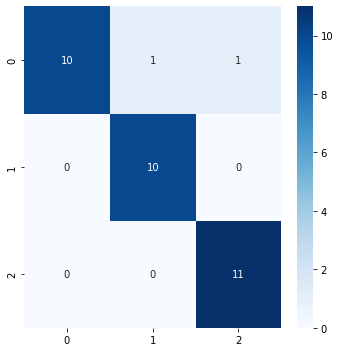

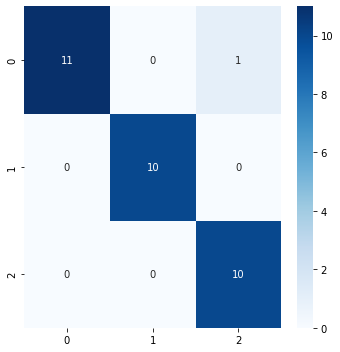

In [183]:
# Create random forest classifier object
random4 = RandomForestClassifier(n_estimators = 50, criterion = 'gini', random_state=0, n_jobs=-1)

#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    random4.fit(X_tr, y_tr)
    y_p = random4.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  classification report
    print("RF Prediction report", "\n", classification_report(y_v,y_p))
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + '4featurerandom_' + str(len(accuracy_l)) + 'confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)


In [184]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

Random Forest score :  0.95
1.6005859375
Condition    0.029297
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [185]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("Random Forest Prediction confusion_matrix", "\n", a)
print("\n")
print("Random Forest Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

Random Forest Prediction confusion_matrix 
 [[11  0  1]
 [ 0 10  0]
 [ 0  0 10]]


Random Forest Prediction classification report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

Normal1_accuracy: 0.917
Condition4_accuracy: 1.0
Condition3_accuracy: 1.0


In [186]:
#Adaboost

In [5]:
model_name = 'Adaboost'
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']

#print(condition_X)

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#condition
print(X)
#print(y)
#print("data length:", len(y))
#print("data length:", len(X))

     Cylinder heating zone 1  Cylinder heating zone 4  \
0                     271.52               316.140000   
1                     271.19               320.240000   
2                     283.09               307.250000   
3                     269.67               298.810000   
4                     290.22               312.940000   
..                       ...                      ...   
126                   287.71               315.920000   
127                   277.99               309.604054   
128                   268.84               311.970000   
129                   288.93               304.010000   
130                   286.02               310.980000   

     Maximum injection pressure  Mould temperature control unit 1  Cycle time  \
0                       1506.14                             92.63      29.860   
1                       1452.35                             91.95      30.138   
2                       1474.93                             87.64      2


 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.82
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.77      0.77      0.77        13
           3       0.70      0.70      0.70        10
           4       1.00      1.00      1.00        10

    accuracy                           0.82        33
   macro avg       0.82      0.82      0.82        33
weighted avg       0.82      0.82      0.82        33


 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.67
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.54      1.00      0.70        13
           3       0.00      0.00      0.00        10
           4       1.00      0.90      0.95        10

    accuracy                           0.67        33
   macro avg       0.51      0.63      0.55        33
weighted avg       0.52      0.67      0.56        33


 iteration:

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being


 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 0.94
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           3       1.00      0.90      0.95        10
           4       0.91      1.00      0.95        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


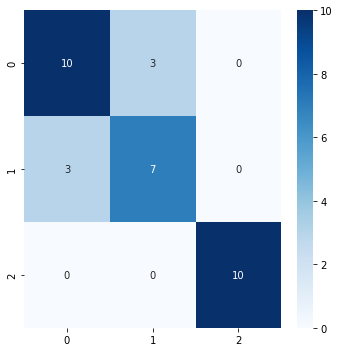

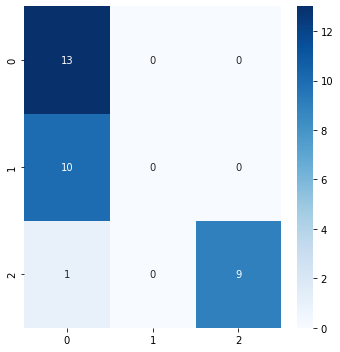

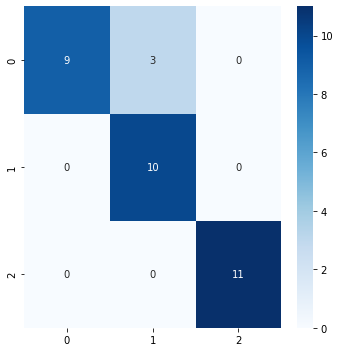

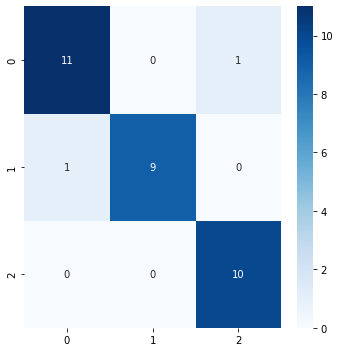

In [8]:
#Example 3 AdaBoostClassifier
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost tree classifier object
adaboostall = AdaBoostClassifier(n_estimators =10, learning_rate=1.0, random_state=0)
model = adaboostall.fit(condition_X,condition_y)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    model = adaboostall.fit(X_tr, y_tr)
    y_p = model.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  Confusion matrix and classification report
 
    print("Adaboost Prediction report", "\n", classification_report(y_v,y_p))
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    #plt.savefig(savePath + '/' + 'adaboost_' + str(len(accuracy_l)) + 'confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    #result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)


In [9]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

Adaboost score :  0.83
1.6787109375
Condition   -0.056641
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [10]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("Adaboost Prediction confusion_matrix", "\n", a)
print("\n")
print("Adaboost Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

Adaboost Prediction confusion_matrix 
 [[11  0  1]
 [ 1  9  0]
 [ 0  0 10]]


Adaboost Prediction classification report 
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           3       1.00      0.90      0.95        10
           4       0.91      1.00      0.95        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32

Normal1_accuracy: 0.917
Condition4_accuracy: 0.9
Condition3_accuracy: 1.0


In [11]:
# For a new observation
observation =[condition_X.iloc[1].values.flatten().tolist()]

# Predict observation's class
y = model.predict(observation)
print("prediction class:", y)

prediction class: [1]


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Feature names: ['Material cushion', 'Switch-over volume', 'Cycle time', 'Cylinder heating zone 1', 'Cylinder heating zone 3', 'Dosage time', 'Cylinder heating zone 2', 'Injection time', 'Cylinder heating zone 5', 'Mould temperature control unit 1', 'Maximum injection pressure', 'Cylinder heating zone 4']
Feature importance: [0.7 0.1 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0. ]


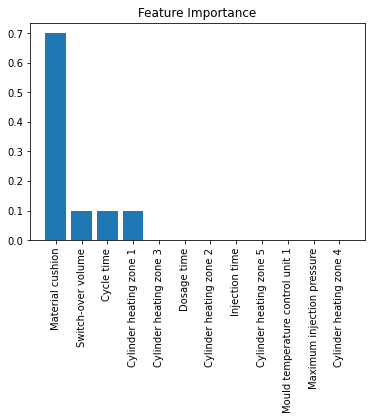

In [12]:
#Example 2 - Identifying Important Features in Random Forests
# Calculate feature importances
feature_names = condition_X.keys().to_numpy()
features = condition_X
target = condition_y
importances = adaboostall.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
#print("indices:", indices)

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]
print("Feature names:", names)
print("Feature importance:", importances[indices])

#Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(features.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [192]:
#Adaboost with 2 features

In [193]:
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = features_important2
condition_y = condition['Condition']

#print(condition_X)

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#condition
print(X)
#print(y)
#print("data length:", len(y))
#print("data length:", len(X))

            0         1
0    1.483340  0.958447
1    1.363340  0.959772
2    1.383340  0.919388
3    1.513340  0.936952
4    1.511638  0.952397
..        ...       ...
126  1.683970  1.034150
127  1.603970  0.991890
128  1.873970  1.071890
129  1.633970  0.995290
130  1.863970  0.993960

[131 rows x 2 columns]



 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.82
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.77      0.77      0.77        13
           3       0.70      0.70      0.70        10
           4       1.00      1.00      1.00        10

    accuracy                           0.82        33
   macro avg       0.82      0.82      0.82        33
weighted avg       0.82      0.82      0.82        33



C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.76


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.62      1.00      0.76        13
           3       1.00      0.30      0.46        10
           4       1.00      0.90      0.95        10

    accuracy                           0.76        33
   macro avg       0.87      0.73      0.72        33
weighted avg       0.85      0.76      0.73        33


 iteration: 3
training data length: 98
verification data length: 33


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.94
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           3       1.00      0.80      0.89        10
           4       1.00      1.00      1.00        11

    accuracy                           0.94        33
   macro avg       0.95      0.93      0.94        33
weighted avg       0.95      0.94      0.94        33


 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 0.94
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           3       1.00      0.90      0.95        10
           4       0.91      1.00      0.95        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



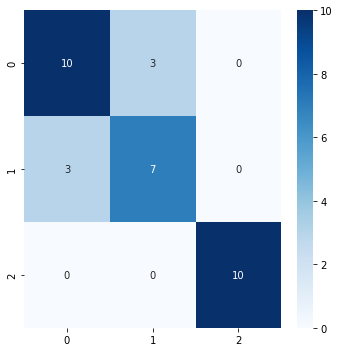

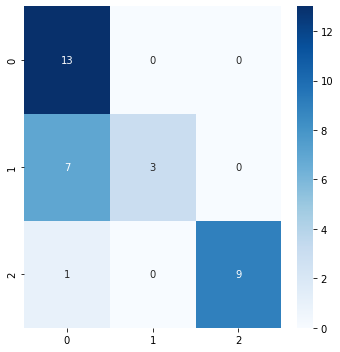

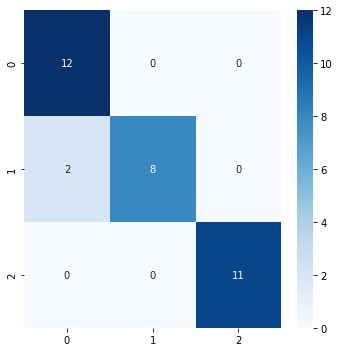

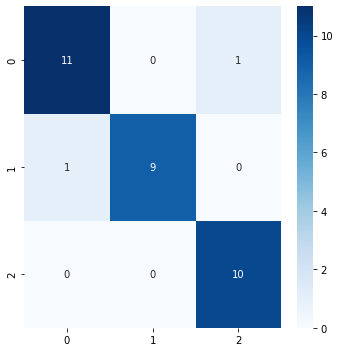

In [194]:
#Example 3 AdaBoostClassifier
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost tree classifier object
adaboost2 = AdaBoostClassifier(n_estimators =10, learning_rate=1.0, random_state=0)
model = adaboost2.fit(condition_X,condition_y)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    model = adaboost2.fit(X_tr, y_tr)
    y_p = model.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  Confusion matrix and classification report
 
    print("Adaboost Prediction report", "\n", classification_report(y_v,y_p))
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'adaboost_' + str(len(accuracy_l)) + 'confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)


In [195]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

Adaboost score :  0.86
1.6787109375
Condition   -0.056641
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [196]:
#Random Forest with 2 features plus adaboost

In [197]:
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = features_important2
condition_y = condition['Condition']

#print(condition_X)

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#condition
#print(X)
#print(y)
#print("data length:", len(y))
#print("data length:", len(X))


 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.91
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           3       1.00      0.70      0.82        10
           4       1.00      1.00      1.00        10

    accuracy                           0.91        33
   macro avg       0.94      0.90      0.91        33
weighted avg       0.93      0.91      0.91        33



C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.97
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        10

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.97
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        11

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 0.97
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


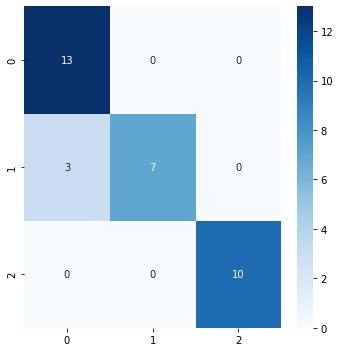

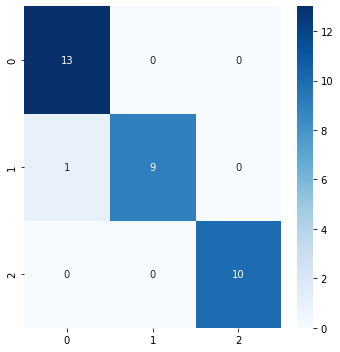

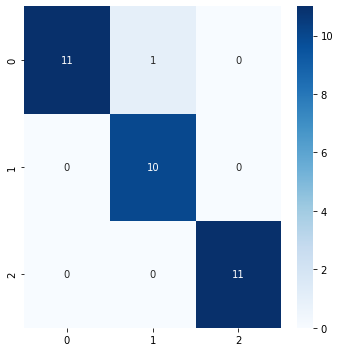

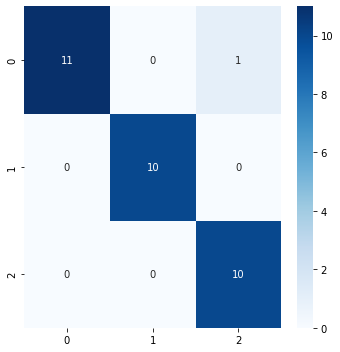

In [198]:
#Example 3 AdaBoostClassifier
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost tree classifier object
adaboostrandom2 = AdaBoostClassifier(n_estimators =10,base_estimator=random2, learning_rate=1.0, random_state=0)
model = adaboostrandom2.fit(condition_X,condition_y)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    model = adaboostrandom2.fit(X_tr, y_tr)
    y_p = model.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  Confusion matrix and classification report
 
    print("Adaboost Prediction report", "\n", classification_report(y_v,y_p))
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'adaboost_' + str(len(accuracy_l)) + 'confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)


In [199]:
model_name = 'Random Forest'
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

Random Forest score :  0.95
1.6005859375
Condition    0.029297
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [200]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("Random Forest Prediction confusion_matrix", "\n", a)
print("\n")
print("Random Forest Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

Random Forest Prediction confusion_matrix 
 [[11  0  1]
 [ 0 10  0]
 [ 0  0 10]]


Random Forest Prediction classification report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

Normal1_accuracy: 0.917
Condition4_accuracy: 1.0
Condition3_accuracy: 1.0


In [201]:
#SVM linear

training data length: 98
verification data length: 33
Accuracy: 0.85


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


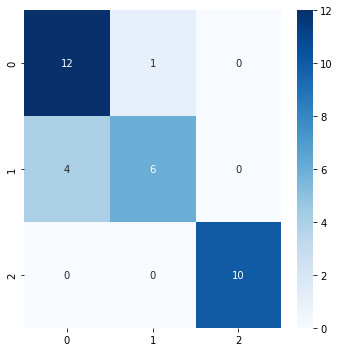

SVM classification_report:
               precision    recall  f1-score   support

           1       0.75      0.92      0.83        13
           3       0.86      0.60      0.71        10
           4       1.00      1.00      1.00        10

    accuracy                           0.85        33
   macro avg       0.87      0.84      0.84        33
weighted avg       0.86      0.85      0.84        33

training data length: 98
verification data length: 33
Accuracy: 0.82


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


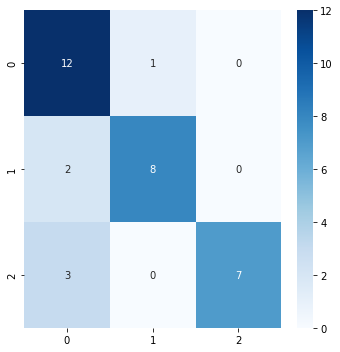

SVM classification_report:
               precision    recall  f1-score   support

           1       0.71      0.92      0.80        13
           3       0.89      0.80      0.84        10
           4       1.00      0.70      0.82        10

    accuracy                           0.82        33
   macro avg       0.86      0.81      0.82        33
weighted avg       0.85      0.82      0.82        33

training data length: 98
verification data length: 33
Accuracy: 0.91


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


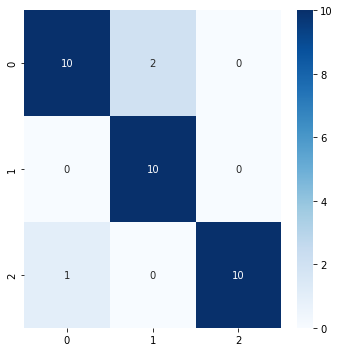

SVM classification_report:
               precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           3       0.83      1.00      0.91        10
           4       1.00      0.91      0.95        11

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.92      0.91      0.91        33

training data length: 99
verification data length: 32
Accuracy: 0.97


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


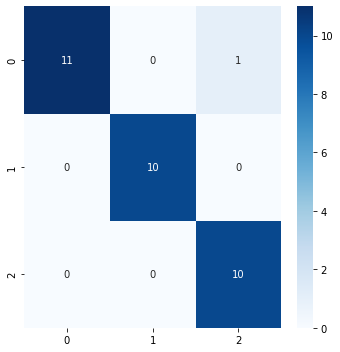

SVM classification_report:
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



In [202]:
model_name = 'SVM Linear'
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
#condition_X = features_important2
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#define SVC model
linear =SVC(kernel='linear') 
#model2 =SVC() #using default
#model2 = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)

scaler = StandardScaler()
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_train = X.iloc[tr_i]
    X_test = X.iloc[te_i]
    X_tr = scaler.fit_transform(X_train)
    X_v = scaler.transform(X_test)
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    
    #fit decision tree model and predict y_p
    linear.fit(X_tr, y_tr)
    y_p = linear.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'linear_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()
    #generate classification report
    print("SVM classification_report:\n", classification_report(y_v, y_p))
    
    #Visualization
    #plot_decision_regions(X_v, y_v.values.flatten(), model2)

In [203]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

SVM Linear score :  0.89
1.6005859375
Condition    0.029297
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [204]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("SVM Linear Prediction confusion_matrix", "\n", a)
print("\n")
print("SVM Linear Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

SVM Linear Prediction confusion_matrix 
 [[11  0  1]
 [ 0 10  0]
 [ 0  0 10]]


SVM Linear Prediction classification report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

Normal1_accuracy: 0.917
Condition4_accuracy: 1.0
Condition3_accuracy: 1.0


In [205]:
%%time
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Load data
model_name = 'SVM Linear'
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
# Create adaboost tree classifier object
linear =SVC(probability=True, kernel='linear',random_state=0) 
adaboostlinearall = AdaBoostClassifier(base_estimator=linear,random_state=0)
#model = adaboostgriddecisionall.fit(condition_X,condition_y)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
param_grid = {'n_estimators': range(10,100,10),'learning_rate':[0.1,1]}
#adaboostgriddecisionall = AdaBoostClassifier(n_estimators =10,base_estimator=griddecisionall, learning_rate=1.0, random_state=0)
gridadaboost = GridSearchCV(adaboostlinearall, param_grid=param_grid)
gridadaboost.fit(X_tr,y_tr)
print(gridadaboost.best_estimator_)
print(gridadaboost.best_params_)

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True,
                                      random_state=0),
                   learning_rate=0.1, random_state=0)
{'learning_rate': 0.1, 'n_estimators': 50}
CPU times: total: 27 s
Wall time: 43.7 s



 iteration: 1
training data length: 98
verification data length: 33


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.52
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.45      1.00      0.62        13
           3       0.00      0.00      0.00        10
           4       1.00      0.40      0.57        10

    accuracy                           0.52        33
   macro avg       0.48      0.47      0.40        33
weighted avg       0.48      0.52      0.42        33


 iteration: 2
training data length: 98
verification data length: 33


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\util

Accuracy: 0.55
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.52      0.85      0.65        13
           3       0.00      0.00      0.00        10
           4       0.58      0.70      0.64        10

    accuracy                           0.55        33
   macro avg       0.37      0.52      0.43        33
weighted avg       0.38      0.55      0.45        33


 iteration: 3
training data length: 98
verification data length: 33


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\util

Accuracy: 0.42
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.39      1.00      0.56        12
           3       0.00      0.00      0.00        10
           4       1.00      0.18      0.31        11

    accuracy                           0.42        33
   macro avg       0.46      0.39      0.29        33
weighted avg       0.47      0.42      0.31        33


 iteration: 4
training data length: 99
verification data length: 32


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\util

Accuracy: 0.31
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.29      0.50      0.36        12
           3       0.50      0.10      0.17        10
           4       0.33      0.30      0.32        10

    accuracy                           0.31        32
   macro avg       0.37      0.30      0.28        32
weighted avg       0.37      0.31      0.29        32



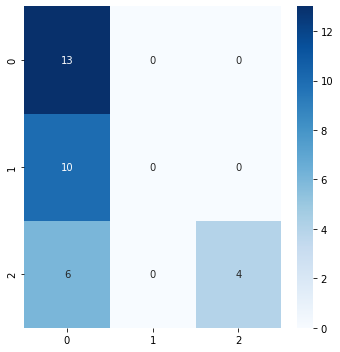

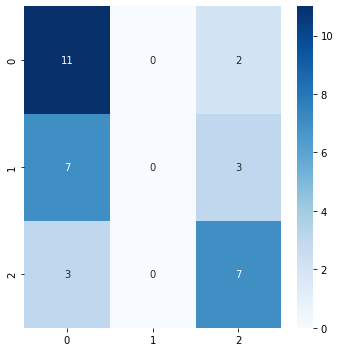

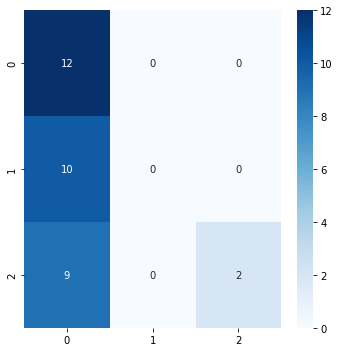

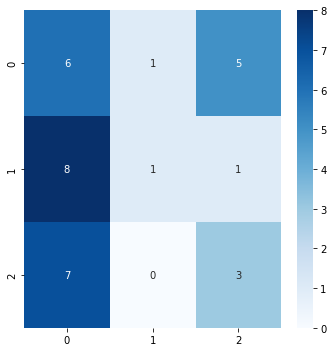

In [206]:
#Example 3 AdaBoostClassifier
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Load data
model_name = 'SVM Linear'
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
# Create adaboost tree classifier object
adaboostlinearall=AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True),learning_rate=0.1, n_estimators=30)
model = gridadaboost.best_estimator_.fit(condition_X,condition_y)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    model = gridadaboost.best_estimator_.fit(X_tr, y_tr)
    y_p = model.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  Confusion matrix and classification report
 
    print("Adaboost Prediction report", "\n", classification_report(y_v,y_p))
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'adaboost_' + str(len(accuracy_l)) + 'confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)


In [207]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

SVM Linear score :  0.45
1.8427734375
Condition    0.130859
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [208]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("Random Forest Prediction confusion_matrix", "\n", a)
print("\n")
print("Random Forest Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

Random Forest Prediction confusion_matrix 
 [[6 1 5]
 [8 1 1]
 [7 0 3]]


Random Forest Prediction classification report 
               precision    recall  f1-score   support

           1       0.29      0.50      0.36        12
           3       0.50      0.10      0.17        10
           4       0.33      0.30      0.32        10

    accuracy                           0.31        32
   macro avg       0.37      0.30      0.28        32
weighted avg       0.37      0.31      0.29        32

Normal1_accuracy: 0.5
Condition4_accuracy: 0.1
Condition3_accuracy: 0.3


In [209]:
#svm linear wiht 3 features

In [210]:
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
#condition_X = features_important2
condition_X = selected_xtrain
#condition_X = condition.iloc[:,condition.columns != 'Condition']

condition_y = condition['Condition']

#print(condition_X)

#convrt to data frame 
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#condition
print(X)
#print(y)
#print("data length:", len(y))
#print("data length:", len(X))

         0         1         2
0    0.234  1.483340  0.958447
1    0.234  1.363340  0.959772
2    0.234  1.383340  0.919388
3    0.224  1.513340  0.936952
4    0.244  1.511638  0.952397
..     ...       ...       ...
126  0.228  1.683970  1.034150
127  0.238  1.603970  0.991890
128  0.228  1.873970  1.071890
129  0.238  1.633970  0.995290
130  0.228  1.863970  0.993960

[131 rows x 3 columns]


training data length: 98
verification data length: 33
Accuracy: 0.94


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


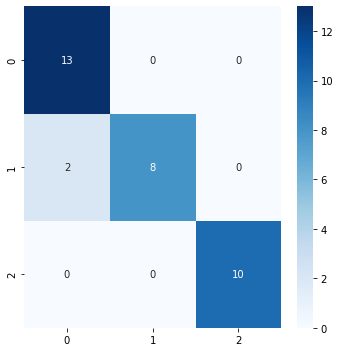

SVM classification_report:
               precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           3       1.00      0.80      0.89        10
           4       1.00      1.00      1.00        10

    accuracy                           0.94        33
   macro avg       0.96      0.93      0.94        33
weighted avg       0.95      0.94      0.94        33

training data length: 98
verification data length: 33
Accuracy: 0.97


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


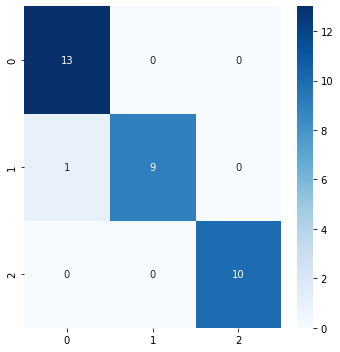

SVM classification_report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        10

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33

training data length: 98
verification data length: 33
Accuracy: 0.88


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


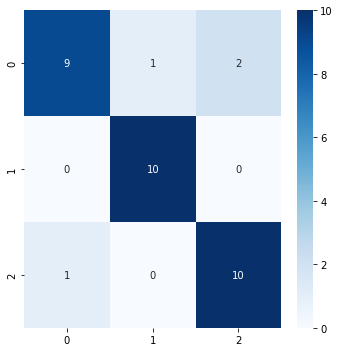

SVM classification_report:
               precision    recall  f1-score   support

           1       0.90      0.75      0.82        12
           3       0.91      1.00      0.95        10
           4       0.83      0.91      0.87        11

    accuracy                           0.88        33
   macro avg       0.88      0.89      0.88        33
weighted avg       0.88      0.88      0.88        33

training data length: 99
verification data length: 32
Accuracy: 0.97


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


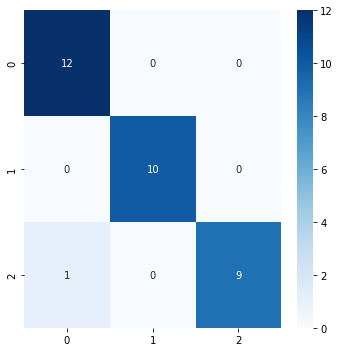

SVM classification_report:
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        10
           4       1.00      0.90      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



In [211]:
model_name = 'SVM Linear'
# Load data
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
#define SVC model
linear =SVC(kernel='linear') 
#model2 =SVC() #using default
#model2 = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)

scaler = StandardScaler()
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_train = X.iloc[tr_i]
    X_test = X.iloc[te_i]
    X_tr = scaler.fit_transform(X_train)
    X_v = scaler.transform(X_test)
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    
    #fit decision tree model and predict y_p
    linear.fit(X_tr, y_tr)
    y_p = linear.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'linear_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()
    #generate classification report
    print("SVM classification_report:\n", classification_report(y_v, y_p))
    
    #Visualization
    #plot_decision_regions(X_v, y_v.values.flatten(), model2)

In [212]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

SVM Linear score :  0.94
1.6240234375
Condition    0.005859
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [213]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("SVM Linear Prediction confusion_matrix", "\n", a)
print("\n")
print("SVM Linear Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

SVM Linear Prediction confusion_matrix 
 [[12  0  0]
 [ 0 10  0]
 [ 1  0  9]]


SVM Linear Prediction classification report 
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        10
           4       1.00      0.90      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

Normal1_accuracy: 1.0
Condition4_accuracy: 1.0
Condition3_accuracy: 0.9


In [214]:
#SVM linear with 2 features

training data length: 98
verification data length: 33
Accuracy: 0.97


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


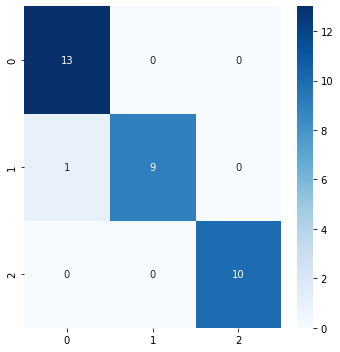

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


SVM classification_report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        10

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33

training data length: 98
verification data length: 33
Accuracy: 0.97


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


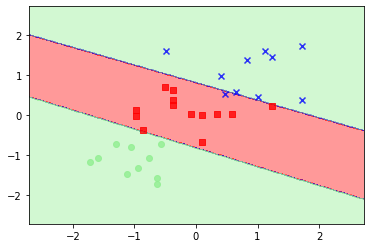

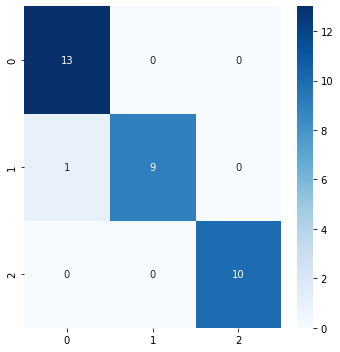

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


SVM classification_report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        10

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33

training data length: 98
verification data length: 33
Accuracy: 0.91


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


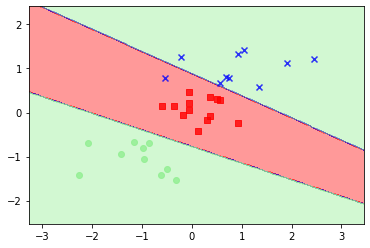

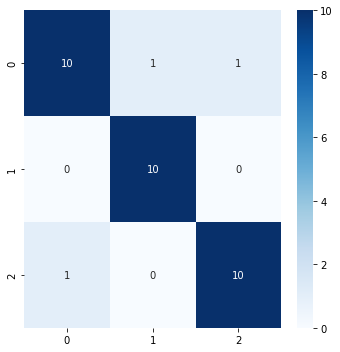

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


SVM classification_report:
               precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           3       0.91      1.00      0.95        10
           4       0.91      0.91      0.91        11

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33

training data length: 99
verification data length: 32
Accuracy: 1.0


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


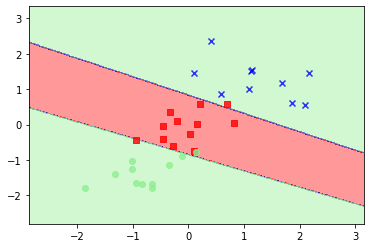

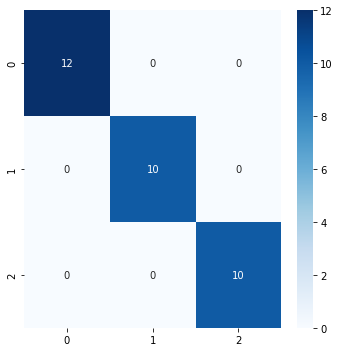

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


SVM classification_report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



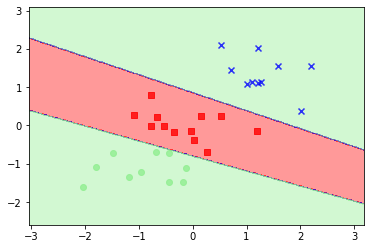

In [215]:
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
#condition_X = features_important2
condition_X = features_important2
condition_y = condition['Condition']
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#define SVC model
linear2 =SVC(kernel='linear') 
#model2 =SVC() #using default
#model2 = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)

scaler = StandardScaler()
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_train = X.iloc[tr_i]
    X_test = X.iloc[te_i]
    X_tr = scaler.fit_transform(X_train)
    X_v = scaler.transform(X_test)
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    
    #fit decision tree model and predict y_p
    linear2.fit(X_tr, y_tr)
    y_p = linear2.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'linear2_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()
    #generate classification report
    print("SVM classification_report:\n", classification_report(y_v, y_p))
    
    #Visualization
    plot_decision_regions(X_v, y_v.values.flatten(), linear2)

In [216]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

SVM Linear score :  0.96
1.62109375
Condition    0.0
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [217]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("SVM Linear Prediction confusion_matrix", "\n", a)
print("\n")
print("SVM Linear Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

SVM Linear Prediction confusion_matrix 
 [[12  0  0]
 [ 0 10  0]
 [ 0  0 10]]


SVM Linear Prediction classification report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Normal1_accuracy: 1.0
Condition4_accuracy: 1.0
Condition3_accuracy: 1.0


In [218]:
#SVM linear with 2 features plus adaboost


 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.91
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.86      0.92      0.89        13
           3       0.89      0.80      0.84        10
           4       1.00      1.00      1.00        10

    accuracy                           0.91        33
   macro avg       0.92      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33



C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.97
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        10

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.94
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           3       1.00      1.00      1.00        10
           4       0.91      0.91      0.91        11

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 0.97
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        10
           4       1.00      0.90      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


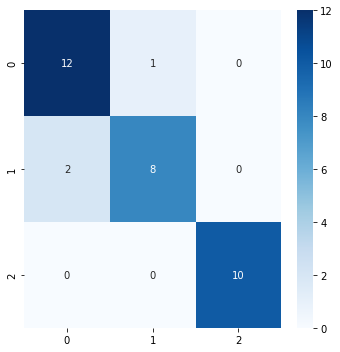

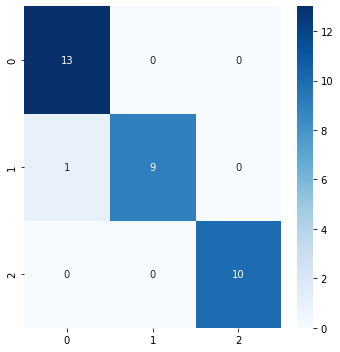

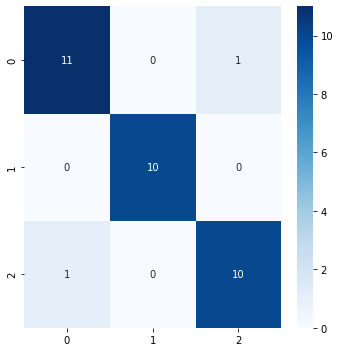

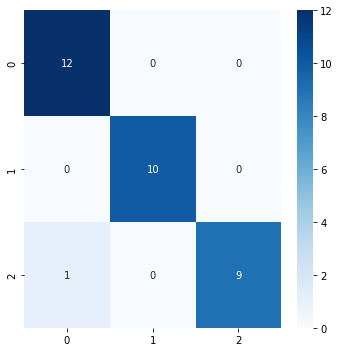

In [219]:
#Example 3 AdaBoostClassifier
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
#condition_X = features_important2
condition_X = features_important2
condition_y = condition['Condition']
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
# Create adaboost tree classifier object
linear2 =SVC(probability=True, kernel='linear') 
adaboostlinear2 = AdaBoostClassifier(n_estimators =10,base_estimator=linear2, learning_rate=1.0, random_state=0)
model = adaboostlinear2.fit(condition_X,condition_y)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    model = adaboostlinear2.fit(X_tr, y_tr)
    y_p = model.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  Confusion matrix and classification report
 
    print("Adaboost Prediction report", "\n", classification_report(y_v,y_p))
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'adaboost_' + str(len(accuracy_l)) + 'confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)
    #Visualization
    #plot_decision_regions(X_v, y_v.values.flatten(), adaboostlinear2)

In [220]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

SVM Linear score :  0.95
1.6240234375
Condition    0.005859
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [221]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("SVM Linear Prediction confusion_matrix", "\n", a)
print("\n")
print("SVM Linear Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

SVM Linear Prediction confusion_matrix 
 [[12  0  0]
 [ 0 10  0]
 [ 1  0  9]]


SVM Linear Prediction classification report 
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        10
           4       1.00      0.90      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

Normal1_accuracy: 1.0
Condition4_accuracy: 1.0
Condition3_accuracy: 0.9


In [222]:
#SVM linear with 4 features 

training data length: 98
verification data length: 33
Accuracy: 0.94


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


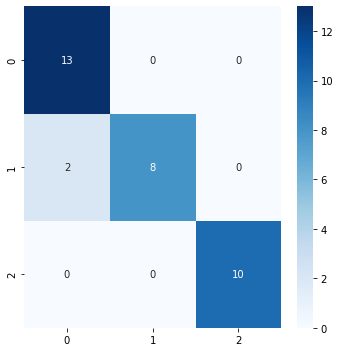

SVM classification_report:
               precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           3       1.00      0.80      0.89        10
           4       1.00      1.00      1.00        10

    accuracy                           0.94        33
   macro avg       0.96      0.93      0.94        33
weighted avg       0.95      0.94      0.94        33

training data length: 98
verification data length: 33
Accuracy: 0.97


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


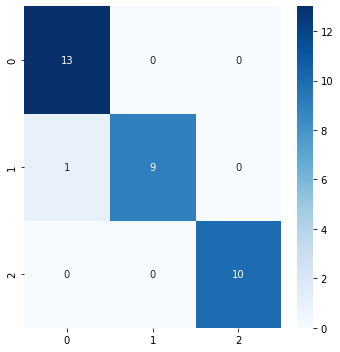

SVM classification_report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        10

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33

training data length: 98
verification data length: 33


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.94


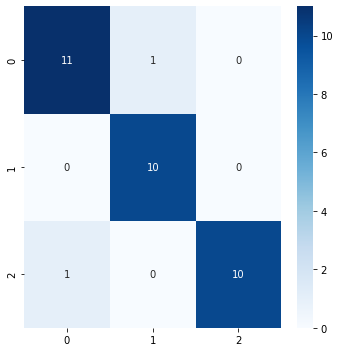

SVM classification_report:
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           3       0.91      1.00      0.95        10
           4       1.00      0.91      0.95        11

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33

training data length: 99
verification data length: 32
Accuracy: 0.97


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


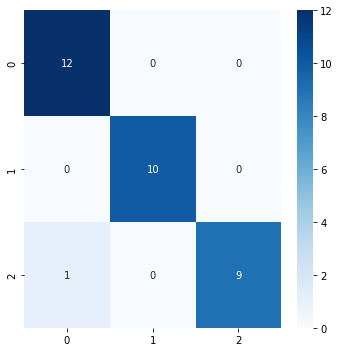

SVM classification_report:
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        10
           4       1.00      0.90      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



In [223]:
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
condition_X = features_important4
condition_y = condition['Condition']
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#define SVC model
linear4 =SVC(kernel='linear') 
#model2 =SVC() #using default
#model2 = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)

scaler = StandardScaler()
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_train = X.iloc[tr_i]
    X_test = X.iloc[te_i]
    X_tr = scaler.fit_transform(X_train)
    X_v = scaler.transform(X_test)
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    
    #fit decision tree model and predict y_p
    linear4.fit(X_tr, y_tr)
    y_p = linear4.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'linear4_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()
    #generate classification report
    print("SVM classification_report:\n", classification_report(y_v, y_p))
    
    #Visualization
    #plot_decision_regions(X_v, y_v.values.flatten(), model2)

In [224]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

SVM Linear score :  0.95
1.6240234375
Condition    0.005859
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [225]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("SVM Linear Prediction confusion_matrix", "\n", a)
print("\n")
print("SVM Linear Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

SVM Linear Prediction confusion_matrix 
 [[12  0  0]
 [ 0 10  0]
 [ 1  0  9]]


SVM Linear Prediction classification report 
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        10
           4       1.00      0.90      0.95        10

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

Normal1_accuracy: 1.0
Condition4_accuracy: 1.0
Condition3_accuracy: 0.9


In [226]:
#SVM poly gridsearchcv

In [227]:
model_name = 'SVM Polynomial'
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
#condition_X = features_important2
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#define SVC model
linear =SVC(kernel='poly') 
#model2 =SVC() #using default
#model2 = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)

scaler = StandardScaler()
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_train = X.iloc[tr_i]
    X_test = X.iloc[te_i]
    X_tr = scaler.fit_transform(X_train)
    X_v = scaler.transform(X_test)
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
param_grid = {'C': [0.001,0.01,0.1,1, 10, 100], 'gamma': ['scale','auto',0.001,0.01,0.1,1,10,100],'kernel': ['rbf', 'poly'],'degree':range(2,7)}    
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly'],'degree':range(2,5)}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_tr,y_tr)
#print('Best parameters found:\n', grid.best_params_)
# All results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
#for mean, std, params in zip(sorted(means,reverse=True), stds, grid.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print(grid.best_estimator_)
print(grid.best_params_)
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(sorted(means,reverse=True), stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.001, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, degree=2, gamma=a

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .........C=0.001, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.001, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, 

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .............C=0.001, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.001, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ............C=0.001, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ............C=0.001, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ............C=0.001, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ............C=0.001, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.001, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END ...........C=0.001,

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .........C=0.001, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.001, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, 

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .............C=0.001, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.001, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ............C=0.001, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ............C=0.001, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ............C=0.001

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .........C=0.001, degree=4, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=4, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=4, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=4, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.001, degree=4, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=4, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=4, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=4, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=4, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.001, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, 

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .........C=0.001, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ........C=0.001, degree=4, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=4, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=4, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=4, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=4, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.001, degree=4, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, degree=4, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, degree=4, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, 

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .........C=0.001, degree=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.001, degree=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.001, degree=5, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, degree=5, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, 

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ..........C=0.001, degree=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..........C=0.001, degree=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..........C=0.001, degree=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..........C=0.001, degree=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..........C=0.001, degree=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=0.001, degree=5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, degree=5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, degree=5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, degree=5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, degree=5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.001, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .........C=0.001, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.001, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.001, degree=6, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, degree=6, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, 

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ..........C=0.001, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=0.001, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.001, degree=6, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=6, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=6, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=6, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=6, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, degree=6, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ............C=0.001

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ..........C=0.01, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ..........C=0.01, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, 

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .........C=0.01, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .............C=0.01, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END .............C=0.01, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END .............C=0.01, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .............C=0.01, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .............C=0.01, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .............C=0.01, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .............C=0.01, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ............C=0.01, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END ............C=0.01, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END ............C=0.01, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END ............C=0.01, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END ............C=0.01, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END ............C=0.01,

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ...........C=0.01, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ............C=0.01, degree=4, gamma=10, kernel=poly; total time=   0.0s
[CV] END ............C=0.01, degree=4, gamma=10, kernel=poly; total time=   0.0s
[CV] END ............C=0.01, degree=4, gamma=10, kernel=poly; total time=   0.0s
[CV] END ............C=0.01, degree=4, gamma=10, kernel=poly; total time=   0.0s
[CV] END ............C=0.01, degree=4, gamma=10, kernel=poly; total time=   0.0s
[CV] END ............C=0.01, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ............C=0.01, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ............C=0.01, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ............C=0.01, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ............C=0.01, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, 

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ..........C=0.01, degree=5, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=5, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=5, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=5, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=5, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=0.01, degree=5, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=5, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=5, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=5, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=5, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, 

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ............C=0.01, degree=5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.01, degree=5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.01, degree=5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.01, degree=5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.01, degree=5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.01, degree=5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.01, degree=5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.0

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ..........C=0.01, degree=6, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=0.01, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=6, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=6, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=6, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=6, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=6, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=6, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ...........C=0.01, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.01, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.01, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.01, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.01, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.01, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.01, degree=6, gamma=1, kernel=poly; total time=   0.0s
[CV] END .............C=0.01, degree=6, gamma=1, kernel=poly; total time=   0.0s
[CV] END .............C=0.01, degree=6, gamma=1, kernel=poly; total time=   0.0s
[CV] END .............C=0.01

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ...........C=0.1, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .............C=0.1, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ...........C=0.1, degree=3, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .............C=0.1, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...............C=0.1, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ...........C=0.1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=4, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=4, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, de

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ..............C=0.1, degree=4, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=4, gamma=10, kernel=poly; total time=   0.0s
[CV] END .............C=0.1, degree=4, gamma=10, kernel=poly; total time=   0.0s
[CV] END .............C=0.1, degree=4, gamma=10, kernel=poly; total time=   0.0s
[CV] END .............C=0.1, degree=4, gamma=10, kernel=poly; total time=   0.0s
[CV] END .............C=0.1, degree=4, gamma=10, kernel=poly; total time=   0.0s
[CV] END .............C=0.1, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, 

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ..........C=0.1, degree=5, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=5, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=5, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=5, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=5, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=5, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=5, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ............C=0.1, degree=5, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=5, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=5, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=5, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=5, gamma=100, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, de

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ...........C=0.1, degree=6, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=6, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=6, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=6, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=6, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=6, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=6, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ............C=0.1, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...............C=0.1, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.1, degree=6, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=6, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ..............C=1, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=1, de

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ............C=1, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..............C=1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...............C=1, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...............C=1,

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .............C=1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..............C=1, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, 

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .............C=1, degree=3, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..............C=1, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=1, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ............C=1, degree=4, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..............C=1, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .............C=1, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ...............C=1, degree=4, gamma=10, kernel=poly; total time=   0.0s
[CV] END ...............C=1, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ...............C=1, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ...............C=1, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ...............C=1, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ...............C=1, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END ..............C=1, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END ..............C=1, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END ..............C=1, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END ..............C=1, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=1, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ............C=1, degree=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..............C=1, degree=5, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=5, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=5, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=5, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=5, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=5, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=5, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=5, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=5, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ................C=1, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ................C=1, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ................C=1, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ................C=1, degree=5, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ................C=1, degree=5, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ................C=1, degree=5, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ................C=1, degree=5, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ................C=1, degree=5, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...............C=1, degree=5, gamma=10, kernel=poly; total time=   0.0s
[CV] END ...............C=1, degree=5, gamma=10, kernel=poly; total time=   0.0s
[CV] END ...............C=1, degree=5, gamma=10, kernel=poly; total time=   0.0s
[CV] END ...............C=1, degree=5, gamma=10, kernel=poly; total time=   0.0s
[CV] END ...............C=1,

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .............C=1, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ............C=1, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..............C=1, degree=6, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=6, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=6, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=6, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=6, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=1, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ................C=1, degree=6, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ................C=1, degree=6, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ................C=1, degree=6, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ................C=1, degree=6, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ................C=1, degree=6, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...............C=1, degree=6, gamma=10, kernel=poly; total time=   0.0s
[CV] END ...............C=1, degree=6, gamma=10, kernel=poly; total time=   0.0s
[CV] END ...............C=1, degree=6, gamma=10, kernel=poly; total time=   0.0s
[CV] END ...............C=1, degree=6, gamma=10, kernel=poly; total time=   0.0s
[CV] END ...............C=1, degree=6, gamma=10, kernel=poly; total time=   0.0s
[CV] END ...............C=1, degree=6, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ...............C=1, degree=6, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ...............C=1,

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ...........C=10, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=10, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ............C=10, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .............C=10, 

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ...........C=10, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=10, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ...............C=10, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...............C=10, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...............C=10, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...............C=10, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...............C=10, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..............C=10, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..............C=10, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..............C=10, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..............C=10, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..............C=10, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..............C=10, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ..............C=10, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ..............C=10,

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ............C=10, degree=4, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=4, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=4, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=4, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=10, degree=4, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=4, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=4, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=4, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=4, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=4, gamma=auto, kernel=rbf; total time=   0.0s


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .............C=10, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=4, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...........C=10, de

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .............C=10, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=10, degree=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, de

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ...............C=10, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=5, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=5, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...............C=10, degree=5, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...............C=10, degree=5, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...............C=10, degree=5, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...............C=10, degree=5, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..............C=10, degree=5, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..............C=10, degree=5, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..............C=10,

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ............C=10, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ............C=10, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=10, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=6, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=6, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=6, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=6, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, degree=6, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .............C=10, 

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ...............C=10, degree=6, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...............C=10, degree=6, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...............C=10, degree=6, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...............C=10, degree=6, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..............C=10, degree=6, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..............C=10, degree=6, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..............C=10, degree=6, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..............C=10, degree=6, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..............C=10, degree=6, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..............C=10, degree=6, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ..............C=10, degree=6, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ..............C=10, degree=6, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ..............C=10,

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ..........C=100, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=100, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ..............C=100, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=100, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..............C=100, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..............C=100, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..............C=100, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..............C=100, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .............C=100, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END .............C=100, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END .............C=100, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END .............C=100, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END .............C=100, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END .............C=100, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=100,

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ...........C=100, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=100, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ..........C=100, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=100, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=100, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ..........C=100, degree=4, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=4, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=100, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ...............C=100, degree=4, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=100, degree=4, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=100, degree=4, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=100, degree=4, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=100, degree=4, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=100, degree=4, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=100, degree=4, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=100, degree=4, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=100, degree=4, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..............C=100, degree=4, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..............C=100, degree=4, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..............C=100, degree=4, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..............C=100

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .............C=100, degree=4, gamma=10, kernel=poly; total time=   0.0s
[CV] END .............C=100, degree=4, gamma=10, kernel=poly; total time=   0.0s
[CV] END .............C=100, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=100, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=100, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=100, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=100, degree=4, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=4, gamma=100, kernel=poly; total time=   0.0s
[CV] END ...........C=100, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END ..........C=100, degree=5, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=5, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=5, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=5, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=5, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=5, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=100, degree=5, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=5, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=5, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=5, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=5, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=5, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...........C=100, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .............C=100, degree=5, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=100, degree=5, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=100, degree=5, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=100, degree=5, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=5, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=5, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=5, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=5, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=5, gamma=100, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=100, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=100, degree=6, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=100, d

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .............C=100, degree=6, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...............C=100, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=100, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=100, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=100, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=100, degree=6, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=100, degree=6, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=100

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] END .............C=100, degree=6, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .............C=100, degree=6, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=6, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=6, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=6, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=6, gamma=100, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=6, gamma=100, kernel=poly; total time=   0.0s
SVC(C=100, degree=2, gamma=0.01)
{'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
0.908 (+/-0.042) for {'C': 0.001, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.908 (+/-0.042) for {'C': 0.001, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.908 (+/-0.042) for {'C': 0.001, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
0.908 (+/-0.042) for {'C': 0.001, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
0.908 (+/-0.042)

training data length: 98
verification data length: 33
Accuracy: 0.85


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


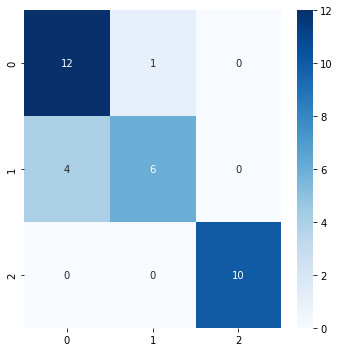

SVM classification_report:
               precision    recall  f1-score   support

           1       0.75      0.92      0.83        13
           3       0.86      0.60      0.71        10
           4       1.00      1.00      1.00        10

    accuracy                           0.85        33
   macro avg       0.87      0.84      0.84        33
weighted avg       0.86      0.85      0.84        33

{'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
training data length: 98
verification data length: 33
Accuracy: 0.88


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


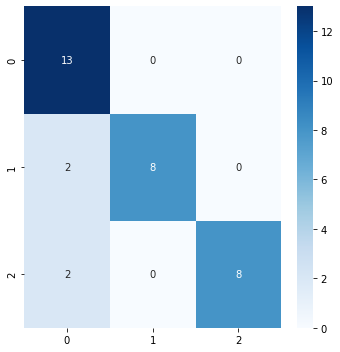

SVM classification_report:
               precision    recall  f1-score   support

           1       0.76      1.00      0.87        13
           3       1.00      0.80      0.89        10
           4       1.00      0.80      0.89        10

    accuracy                           0.88        33
   macro avg       0.92      0.87      0.88        33
weighted avg       0.91      0.88      0.88        33

{'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
training data length: 98
verification data length: 33
Accuracy: 0.91


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


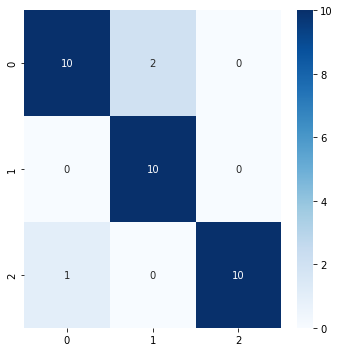

SVM classification_report:
               precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           3       0.83      1.00      0.91        10
           4       1.00      0.91      0.95        11

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.92      0.91      0.91        33

{'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
training data length: 99
verification data length: 32
Accuracy: 0.94


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


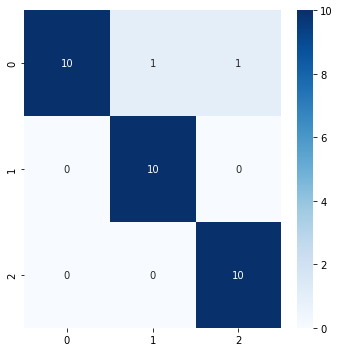

SVM classification_report:
               precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           3       0.91      1.00      0.95        10
           4       0.91      1.00      0.95        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32

{'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}


In [228]:
model_name = 'SVM rbf'
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
#condition_X = features_important2
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#define SVC model
linear =SVC(kernel='poly',C=1,degree=2) 
#model2 =SVC() #using default
#model2 = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)

scaler = StandardScaler()
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_train = X.iloc[tr_i]
    X_test = X.iloc[te_i]
    X_tr = scaler.fit_transform(X_train)
    X_v = scaler.transform(X_test)
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    
    #fit decision tree model and predict y_p
    grid.best_estimator_.fit(X_tr, y_tr)
    y_p = grid.best_estimator_.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'linear_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()
    #generate classification report
    print("SVM classification_report:\n", classification_report(y_v, y_p))
    print(grid.best_params_)
    #Visualization
    #plot_decision_regions(X_v, y_v.values.flatten(), model2)

In [229]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

SVM rbf score :  0.89
1.5146484375
Condition    0.130859
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [230]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("SVM Linear Prediction confusion_matrix", "\n", a)
print("\n")
print("SVM Linear Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

SVM Linear Prediction confusion_matrix 
 [[10  1  1]
 [ 0 10  0]
 [ 0  0 10]]


SVM Linear Prediction classification report 
               precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           3       0.91      1.00      0.95        10
           4       0.91      1.00      0.95        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32

Normal1_accuracy: 0.833
Condition4_accuracy: 1.0
Condition3_accuracy: 1.0


In [231]:
#SVM polynomial 2 features trial and error

training data length: 98
verification data length: 33
Accuracy: 0.85


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


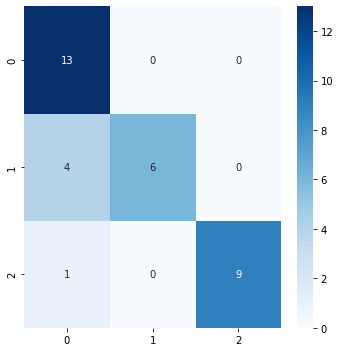

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


SVM classification_report:
               precision    recall  f1-score   support

           1       0.72      1.00      0.84        13
           3       1.00      0.60      0.75        10
           4       1.00      0.90      0.95        10

    accuracy                           0.85        33
   macro avg       0.91      0.83      0.85        33
weighted avg       0.89      0.85      0.84        33

training data length: 98
verification data length: 33
Accuracy: 0.88


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


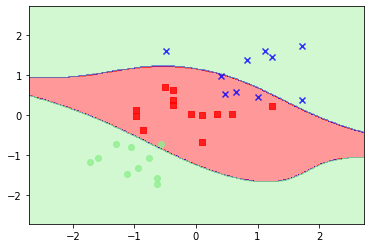

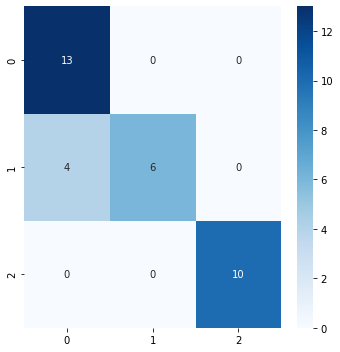

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


SVM classification_report:
               precision    recall  f1-score   support

           1       0.76      1.00      0.87        13
           3       1.00      0.60      0.75        10
           4       1.00      1.00      1.00        10

    accuracy                           0.88        33
   macro avg       0.92      0.87      0.87        33
weighted avg       0.91      0.88      0.87        33

training data length: 98
verification data length: 33
Accuracy: 0.94


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


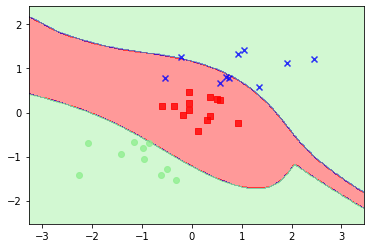

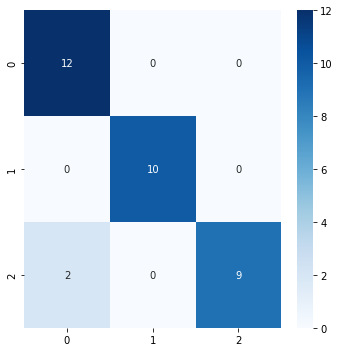

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


SVM classification_report:
               precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           3       1.00      1.00      1.00        10
           4       1.00      0.82      0.90        11

    accuracy                           0.94        33
   macro avg       0.95      0.94      0.94        33
weighted avg       0.95      0.94      0.94        33

training data length: 99
verification data length: 32
Accuracy: 0.91


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


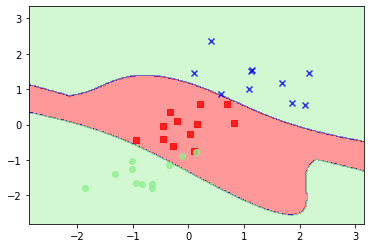

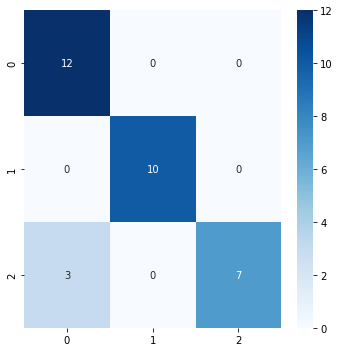

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


SVM classification_report:
               precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           3       1.00      1.00      1.00        10
           4       1.00      0.70      0.82        10

    accuracy                           0.91        32
   macro avg       0.93      0.90      0.90        32
weighted avg       0.93      0.91      0.90        32



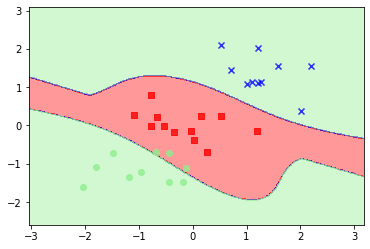

In [232]:
model_name = 'SVM Polynomial'
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
#condition_X = features_important2
condition_X = features_important2
condition_y = condition['Condition']
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#define SVC model
#model2 =SVC(kernel='linear') 
poly2 =SVC(kernel='poly', degree = 3) #using default
#model2 = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)

scaler = StandardScaler()
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_train = X.iloc[tr_i]
    X_test = X.iloc[te_i]
    X_tr = scaler.fit_transform(X_train)
    X_v = scaler.transform(X_test)
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    
    #fit decision tree model and predict y_p
    poly2.fit(X_tr, y_tr)
    y_p = poly2.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'rbf_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()
    #generate classification report
    print("SVM classification_report:\n", classification_report(y_v, y_p))
    
    #Visualization
    plot_decision_regions(X_v, y_v.values.flatten(), poly2)

In [233]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

SVM Polynomial score :  0.89
1.5771484375
Condition    0.123047
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [234]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("SVM Polynomial Prediction confusion_matrix", "\n", a)
print("\n")
print("SVM Polynomial Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

SVM Polynomial Prediction confusion_matrix 
 [[12  0  0]
 [ 0 10  0]
 [ 3  0  7]]


SVM Polynomial Prediction classification report 
               precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           3       1.00      1.00      1.00        10
           4       1.00      0.70      0.82        10

    accuracy                           0.91        32
   macro avg       0.93      0.90      0.90        32
weighted avg       0.93      0.91      0.90        32

Normal1_accuracy: 1.0
Condition4_accuracy: 1.0
Condition3_accuracy: 0.7


In [235]:
#SVM polynomial all features trial and error

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training data length: 98
verification data length: 33
Accuracy: 0.76


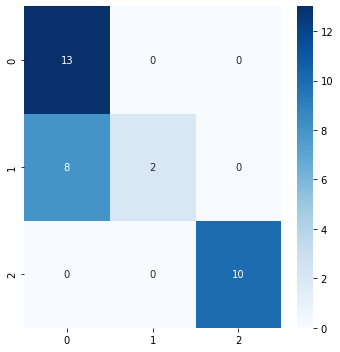

SVM classification_report:
               precision    recall  f1-score   support

           1       0.62      1.00      0.76        13
           3       1.00      0.20      0.33        10
           4       1.00      1.00      1.00        10

    accuracy                           0.76        33
   macro avg       0.87      0.73      0.70        33
weighted avg       0.85      0.76      0.71        33

training data length: 98
verification data length: 33
Accuracy: 0.82


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


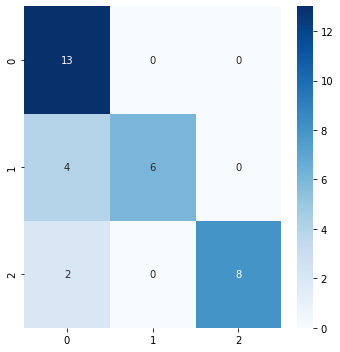

SVM classification_report:
               precision    recall  f1-score   support

           1       0.68      1.00      0.81        13
           3       1.00      0.60      0.75        10
           4       1.00      0.80      0.89        10

    accuracy                           0.82        33
   macro avg       0.89      0.80      0.82        33
weighted avg       0.88      0.82      0.82        33

training data length: 98
verification data length: 33
Accuracy: 0.91


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


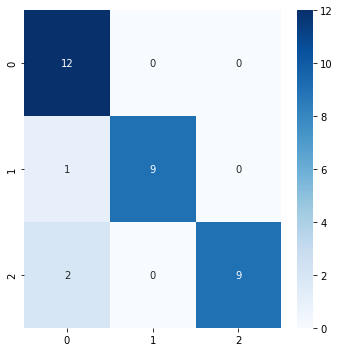

SVM classification_report:
               precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           3       1.00      0.90      0.95        10
           4       1.00      0.82      0.90        11

    accuracy                           0.91        33
   macro avg       0.93      0.91      0.91        33
weighted avg       0.93      0.91      0.91        33

training data length: 99
verification data length: 32
Accuracy: 0.75


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


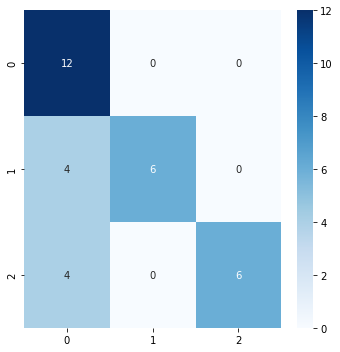

SVM classification_report:
               precision    recall  f1-score   support

           1       0.60      1.00      0.75        12
           3       1.00      0.60      0.75        10
           4       1.00      0.60      0.75        10

    accuracy                           0.75        32
   macro avg       0.87      0.73      0.75        32
weighted avg       0.85      0.75      0.75        32



In [236]:
model_name = 'SVM Polynomial'
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
#condition_X = features_important2
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#define SVC model
#model2 =SVC(kernel='linear') 
poly2 =SVC(kernel='poly', degree = 3) #using default
#model2 = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)

scaler = StandardScaler()
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_train = X.iloc[tr_i]
    X_test = X.iloc[te_i]
    X_tr = scaler.fit_transform(X_train)
    X_v = scaler.transform(X_test)
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    
    #fit decision tree model and predict y_p
    poly2.fit(X_tr, y_tr)
    y_p = poly2.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'rbf_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()
    #generate classification report
    print("SVM classification_report:\n", classification_report(y_v, y_p))
    
    #Visualization
    #plot_decision_regions(X_v, y_v.values.flatten(), poly2)

In [237]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

SVM Polynomial score :  0.81
1.55859375
Condition    0.453125
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [238]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("SVM Polynomial Prediction confusion_matrix", "\n", a)
print("\n")
print("SVM Polynomial Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

SVM Polynomial Prediction confusion_matrix 
 [[12  0  0]
 [ 4  6  0]
 [ 4  0  6]]


SVM Polynomial Prediction classification report 
               precision    recall  f1-score   support

           1       0.60      1.00      0.75        12
           3       1.00      0.60      0.75        10
           4       1.00      0.60      0.75        10

    accuracy                           0.75        32
   macro avg       0.87      0.73      0.75        32
weighted avg       0.85      0.75      0.75        32

Normal1_accuracy: 1.0
Condition4_accuracy: 0.6
Condition3_accuracy: 0.6


In [239]:
#SVM polynomial with 2 features

training data length: 98
verification data length: 33
Accuracy: 0.85


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


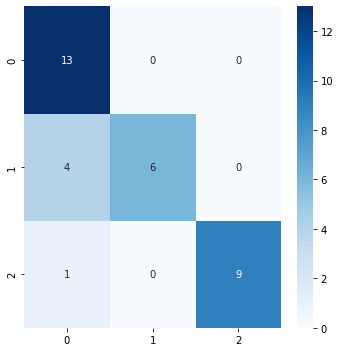

SVM classification_report:
               precision    recall  f1-score   support

           1       0.72      1.00      0.84        13
           3       1.00      0.60      0.75        10
           4       1.00      0.90      0.95        10

    accuracy                           0.85        33
   macro avg       0.91      0.83      0.85        33
weighted avg       0.89      0.85      0.84        33



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


training data length: 98
verification data length: 33
Accuracy: 0.88


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


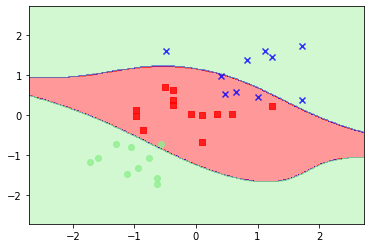

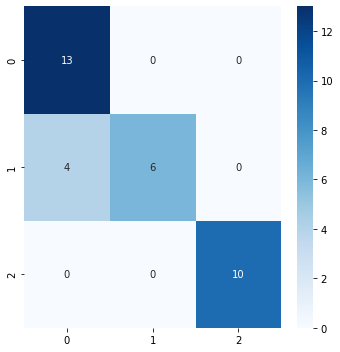

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


SVM classification_report:
               precision    recall  f1-score   support

           1       0.76      1.00      0.87        13
           3       1.00      0.60      0.75        10
           4       1.00      1.00      1.00        10

    accuracy                           0.88        33
   macro avg       0.92      0.87      0.87        33
weighted avg       0.91      0.88      0.87        33

training data length: 98
verification data length: 33
Accuracy: 0.94


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


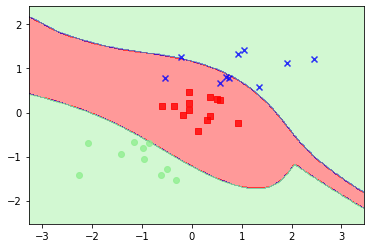

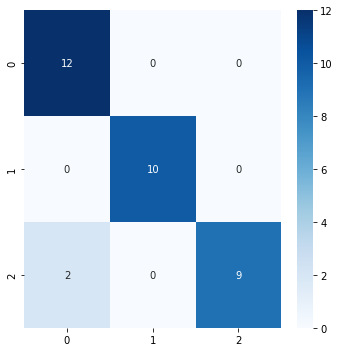

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


SVM classification_report:
               precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           3       1.00      1.00      1.00        10
           4       1.00      0.82      0.90        11

    accuracy                           0.94        33
   macro avg       0.95      0.94      0.94        33
weighted avg       0.95      0.94      0.94        33

training data length: 99
verification data length: 32
Accuracy: 0.91


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


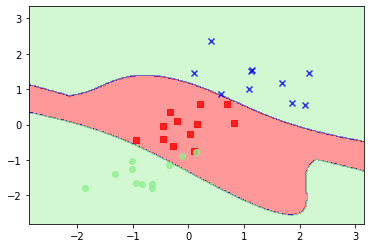

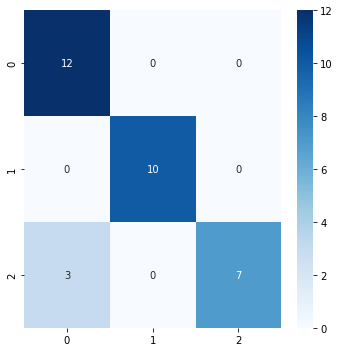

SVM classification_report:
               precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           3       1.00      1.00      1.00        10
           4       1.00      0.70      0.82        10

    accuracy                           0.91        32
   macro avg       0.93      0.90      0.90        32
weighted avg       0.93      0.91      0.90        32



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


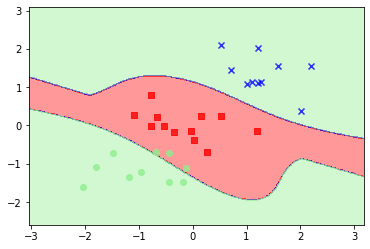

In [240]:
model_name = 'SVM Polynomial'
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
#condition_X = features_important2
condition_X = features_important2
condition_y = condition['Condition']
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#define SVC model
#model2 =SVC(kernel='linear') 
poly2 =SVC(kernel='poly', degree = 3) #using default
#model2 = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)

scaler = StandardScaler()
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_train = X.iloc[tr_i]
    X_test = X.iloc[te_i]
    X_tr = scaler.fit_transform(X_train)
    X_v = scaler.transform(X_test)
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    
    #fit decision tree model and predict y_p
    poly2.fit(X_tr, y_tr)
    y_p = poly2.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'rbf_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()
    #generate classification report
    print("SVM classification_report:\n", classification_report(y_v, y_p))
    
    #Visualization
    plot_decision_regions(X_v, y_v.values.flatten(), poly2)

In [241]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

SVM Polynomial score :  0.89
1.5771484375
Condition    0.123047
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [242]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("SVM Polynomial Prediction confusion_matrix", "\n", a)
print("\n")
print("SVM Polynomial Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

SVM Polynomial Prediction confusion_matrix 
 [[12  0  0]
 [ 0 10  0]
 [ 3  0  7]]


SVM Polynomial Prediction classification report 
               precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           3       1.00      1.00      1.00        10
           4       1.00      0.70      0.82        10

    accuracy                           0.91        32
   macro avg       0.93      0.90      0.90        32
weighted avg       0.93      0.91      0.90        32

Normal1_accuracy: 1.0
Condition4_accuracy: 1.0
Condition3_accuracy: 0.7


In [243]:
#SVM polynomial with 2 features plus adaboost


 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.94
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           3       1.00      0.80      0.89        10
           4       1.00      1.00      1.00        10

    accuracy                           0.94        33
   macro avg       0.96      0.93      0.94        33
weighted avg       0.95      0.94      0.94        33


 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.97
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        10

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.91
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           3       0.91      1.00      0.95        10
           4       0.91      0.91      0.91        11

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33


 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 1.0
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


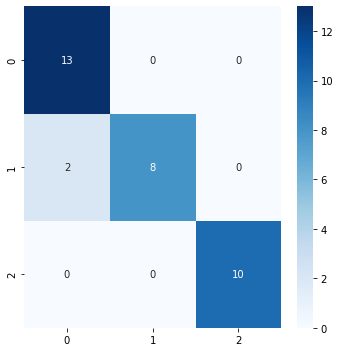

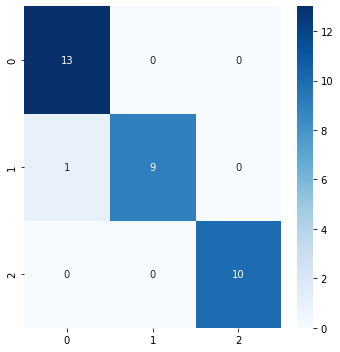

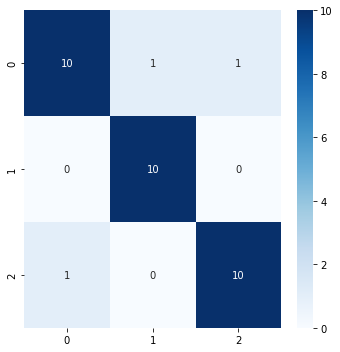

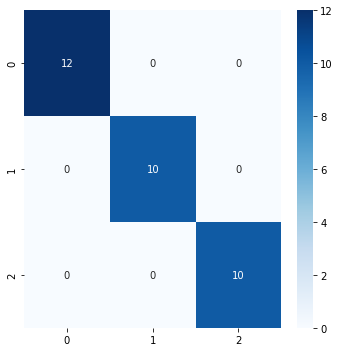

In [244]:
#Example 3 AdaBoostClassifier
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
#condition_X = features_important2
condition_X = features_important2
condition_y = condition['Condition']
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
# Create adaboost tree classifier object
poly2 =SVC(probability = True, kernel='poly', degree = 3) #using default
adaboostpoly2 = AdaBoostClassifier(n_estimators =10,base_estimator=poly2, learning_rate=1.0, random_state=0)
model = adaboostpoly2.fit(condition_X,condition_y)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    model = adaboostpoly2.fit(X_tr, y_tr)
    y_p = model.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  Confusion matrix and classification report
 
    print("Adaboost Prediction report", "\n", classification_report(y_v,y_p))
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'adaboost_' + str(len(accuracy_l)) + 'confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)
    #plot_decision_regions(X_v, y_v.values.flatten(), adaboostpoly2)

In [245]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

SVM Polynomial score :  0.95
1.62109375
Condition    0.0
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [246]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("SVM Polynomial Prediction confusion_matrix", "\n", a)
print("\n")
print("SVM Polynomial Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

SVM Polynomial Prediction confusion_matrix 
 [[12  0  0]
 [ 0 10  0]
 [ 0  0 10]]


SVM Polynomial Prediction classification report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Normal1_accuracy: 1.0
Condition4_accuracy: 1.0
Condition3_accuracy: 1.0


In [247]:
#SVM rbf with 2 features

training data length: 98
verification data length: 33
Accuracy: 0.94


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


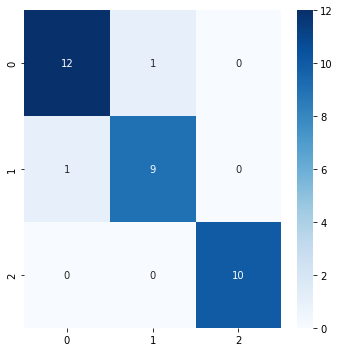

SVM classification_report:
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           3       0.90      0.90      0.90        10
           4       1.00      1.00      1.00        10

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


training data length: 98
verification data length: 33
Accuracy: 0.97


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


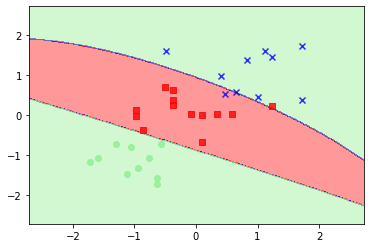

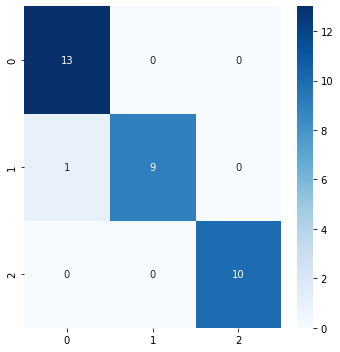

SVM classification_report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        10

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


training data length: 98
verification data length: 33
Accuracy: 0.91


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


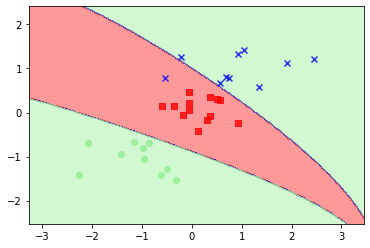

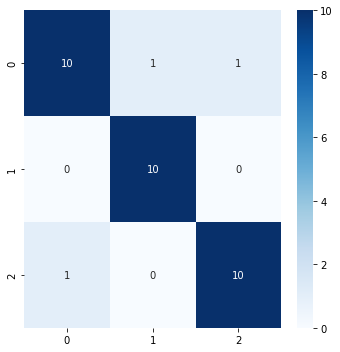

SVM classification_report:
               precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           3       0.91      1.00      0.95        10
           4       0.91      0.91      0.91        11

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


training data length: 99
verification data length: 32
Accuracy: 1.0


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


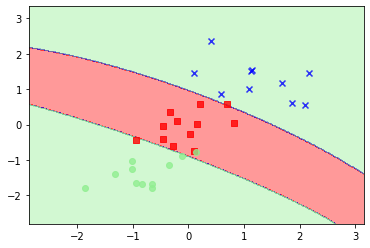

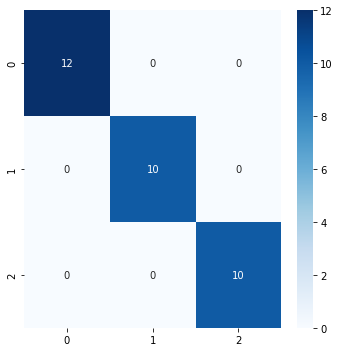

SVM classification_report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


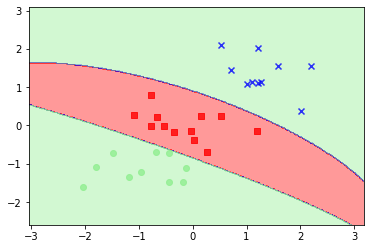

In [248]:
model_name = 'SVM rbf'
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
#condition_X = features_important2
condition_X = features_important2
condition_y = condition['Condition']
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#define SVC model
#model2 =SVC(kernel='linear') 
#model2 =SVC() #using default
rbf2 = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)

scaler = StandardScaler()
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_train = X.iloc[tr_i]
    X_test = X.iloc[te_i]
    X_tr = scaler.fit_transform(X_train)
    X_v = scaler.transform(X_test)
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    
    #fit decision tree model and predict y_p
    rbf2.fit(X_tr, y_tr)
    y_p = rbf2.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'rbf_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()
    #generate classification report
    print("SVM classification_report:\n", classification_report(y_v, y_p))
    
    #Visualization
    plot_decision_regions(X_v, y_v.values.flatten(), rbf2)

In [249]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

SVM rbf score :  0.95
1.62109375
Condition    0.0
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [250]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("SVM rbf Prediction confusion_matrix", "\n", a)
print("\n")
print("SVM rbf Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

SVM rbf Prediction confusion_matrix 
 [[12  0  0]
 [ 0 10  0]
 [ 0  0 10]]


SVM rbf Prediction classification report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Normal1_accuracy: 1.0
Condition4_accuracy: 1.0
Condition3_accuracy: 1.0


In [251]:
#SVM rbf with 2 features plus adaboost


 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.91
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           3       1.00      0.70      0.82        10
           4       1.00      1.00      1.00        10

    accuracy                           0.91        33
   macro avg       0.94      0.90      0.91        33
weighted avg       0.93      0.91      0.91        33


 iteration: 2
training data length: 98
verification data length: 33


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.91
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.92      0.85      0.88        13
           3       0.82      0.90      0.86        10
           4       1.00      1.00      1.00        10

    accuracy                           0.91        33
   macro avg       0.91      0.92      0.91        33
weighted avg       0.91      0.91      0.91        33


 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.88
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       0.83      0.83      0.83        12
           3       0.91      1.00      0.95        10
           4       0.90      0.82      0.86        11

    accuracy                           0.88        33
   macro avg       0.88      0.88      0.88        33
weighted avg       0.88      0.88      0.88        33


 iteration: 4
training data length: 99
verification data length: 32


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
Adaboost Prediction report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



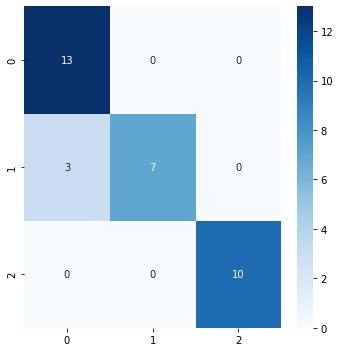

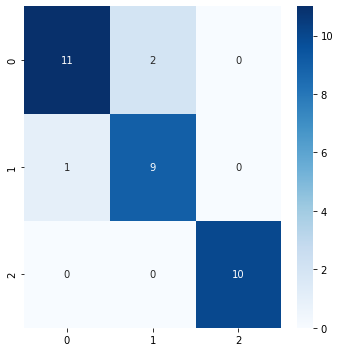

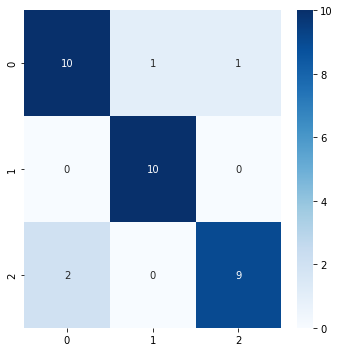

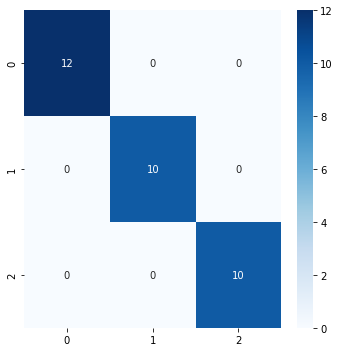

In [252]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
#condition_X = features_important2
condition_X = features_important2
condition_y = condition['Condition']
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
# Create adaboost tree classifier object
rbf2 = SVC(probability = True, kernel='rbf', random_state=0, gamma=.10, C=1.0)
adaboostrbf2 = AdaBoostClassifier(n_estimators =10,base_estimator=rbf2, learning_rate=1.0, random_state=0)
model = adaboostrbf2.fit(condition_X,condition_y)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    model = adaboostrbf2.fit(X_tr, y_tr)
    y_p = model.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  Confusion matrix and classification report
 
    print("Adaboost Prediction report", "\n", classification_report(y_v,y_p))
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'adaboost_' + str(len(accuracy_l)) + 'confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)


In [253]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

SVM rbf score :  0.92
1.62109375
Condition    0.0
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [254]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("SVM rbf Prediction confusion_matrix", "\n", a)
print("\n")
print("SVM rbf Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

SVM rbf Prediction confusion_matrix 
 [[12  0  0]
 [ 0 10  0]
 [ 0  0 10]]


SVM rbf Prediction classification report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Normal1_accuracy: 1.0
Condition4_accuracy: 1.0
Condition3_accuracy: 1.0


In [255]:
#SVM rbf all features trial and error

training data length: 98
verification data length: 33
Accuracy: 0.85


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


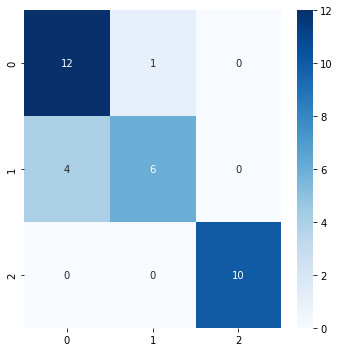

SVM classification_report:
               precision    recall  f1-score   support

           1       0.75      0.92      0.83        13
           3       0.86      0.60      0.71        10
           4       1.00      1.00      1.00        10

    accuracy                           0.85        33
   macro avg       0.87      0.84      0.84        33
weighted avg       0.86      0.85      0.84        33

SVC(gamma=0.1, random_state=0)
training data length: 98
verification data length: 33
Accuracy: 0.94


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


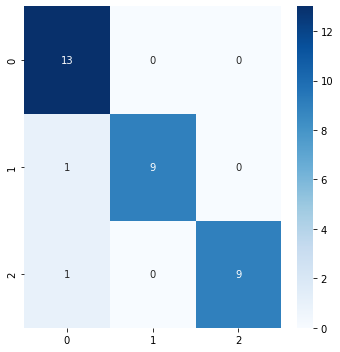

C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM classification_report:
               precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           3       1.00      0.90      0.95        10
           4       1.00      0.90      0.95        10

    accuracy                           0.94        33
   macro avg       0.96      0.93      0.94        33
weighted avg       0.95      0.94      0.94        33

SVC(gamma=0.1, random_state=0)
training data length: 98
verification data length: 33
Accuracy: 0.94


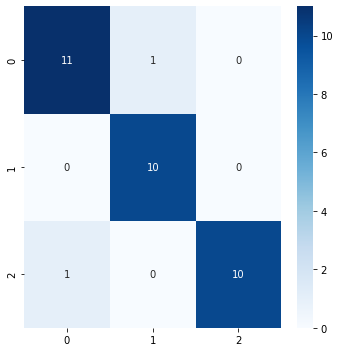

SVM classification_report:
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           3       0.91      1.00      0.95        10
           4       1.00      0.91      0.95        11

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33

SVC(gamma=0.1, random_state=0)
training data length: 99
verification data length: 32
Accuracy: 0.91


C:\Users\lolif\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


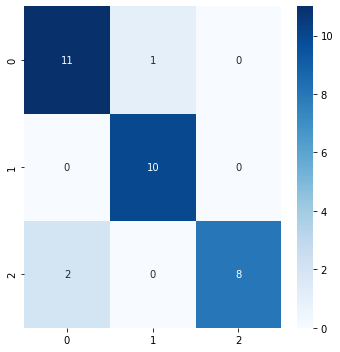

SVM classification_report:
               precision    recall  f1-score   support

           1       0.85      0.92      0.88        12
           3       0.91      1.00      0.95        10
           4       1.00      0.80      0.89        10

    accuracy                           0.91        32
   macro avg       0.92      0.91      0.91        32
weighted avg       0.91      0.91      0.91        32

SVC(gamma=0.1, random_state=0)


In [256]:
model_name = 'SVM rbf'
# Load data
url = "D:\SIT\Y3T1\Machine Learning\Project 1\Group6 - missingdatafinal.csv"
#con = pd.read_csv(url)
condition = pd.read_csv(url)
#condition = con.replace(1,'Normal1').replace(3,'Condition3').replace(4,'Condition4')
#condition_X = features_important2
condition_X = condition.iloc[:,condition.columns != 'Condition']
condition_y = condition['Condition']
X = pd.DataFrame(condition_X)
y = pd.DataFrame(condition_y)
#define SVC model
#model2 =SVC(kernel='linear') 
#poly2 =SVC(kernel='poly', degree = 3) #using default
model2 = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)

scaler = StandardScaler()
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_train = X.iloc[tr_i]
    X_test = X.iloc[te_i]
    X_tr = scaler.fit_transform(X_train)
    X_v = scaler.transform(X_test)
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    
    #fit decision tree model and predict y_p
    model2.fit(X_tr, y_tr)
    y_p = model2.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/' + 'rbf_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()
    #generate classification report
    print("SVM classification_report:\n", classification_report(y_v, y_p))
    print(model2)
    #Visualization
    #plot_decision_regions(X_v, y_v.values.flatten(), poly2)

In [257]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))
#finding variance of above model
Variance = np.var(y_p)
print(Variance)
#finding bias of above model
SSE = np.mean((np.mean(y_p)-y_v)**2)
Bias = SSE - Variance
print(Bias)

SVM rbf score :  0.91
1.55859375
Condition    0.078125
dtype: float64


C:\Users\lolif\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [258]:
## Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("SVM Polynomial Prediction confusion_matrix", "\n", a)
print("\n")
print("SVM Polynomial Prediction classification report", "\n", 
classification_report(y_v,y_p))
Normal1_accuracy = a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("Normal1_accuracy:", Normal1_accuracy.round(3))
Condition4_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("Condition4_accuracy:", Condition4_accuracy.round(3))
Condition3_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("Condition3_accuracy:", Condition3_accuracy.round(3))

SVM Polynomial Prediction confusion_matrix 
 [[11  1  0]
 [ 0 10  0]
 [ 2  0  8]]


SVM Polynomial Prediction classification report 
               precision    recall  f1-score   support

           1       0.85      0.92      0.88        12
           3       0.91      1.00      0.95        10
           4       1.00      0.80      0.89        10

    accuracy                           0.91        32
   macro avg       0.92      0.91      0.91        32
weighted avg       0.91      0.91      0.91        32

Normal1_accuracy: 0.917
Condition4_accuracy: 1.0
Condition3_accuracy: 0.8
